# Avocado Project

## Dataset Description

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

### Description of the columns present in the dataset:
Date: Date of data collection.

AveragePrice: Average avocado price.

Total Volume: Total avocados sold/produced.

4046: Avocado type 4046 sold.

4225: Avocado type 4225 sold.

4770: Avocado type 4770 sold.

Total Bags: Total bags of avocados.

Small Bags: Number of small bags.

Large Bags: Number of large bags.

XLarge Bags: Number of XL bags.

type: Avocado type (conventional/organic).

year: Year of data.

region: Geographical region.

### Objective:
The objective of this project is to predict both the region and the average price of avocados using the dataset. In this project, the prediction of region involves the implementation of a classification model, while the prediction of average price involves the use of a regression model.

### Features and target variable for classification model:

#### Features: 
Date, AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year

#### Target variable:
region

### Features and target variable for regression model:

#### Features: 
Date, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region

#### Target variable:
AveragePrice

## Importing libraries

In [1]:
# Numerical computation and data manipulation 
import numpy as np
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Z-score normalization and Box-Cox transformation
from scipy.stats import zscore, yeojohnson

# Suppress warnings
import warnings 
warnings.filterwarnings('ignore')

# Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# SMOTE for class imbalance problem
from imblearn.over_sampling import SMOTE

# VIF calculation
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Regression models
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet

# K-Nearest Neighbors Classifier and Regressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Gausian Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB

# Decision Tree Classifier and Regressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# Support Vector Classifier and Regressor
from sklearn.svm import SVC, SVR

# Ensemble Algorithms
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier, 
BaggingClassifier, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, BaggingRegressor)

# XGBoost for boosting
import xgboost as xgb

# Metrics for checking the performance of models
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error, 
r2_score)
from sklearn.metrics import auc, roc_curve, RocCurveDisplay

# Data splitting and validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV

# Saving and loading models
import joblib

## Importing dataset

In [2]:
# Load data from CSV into DataFrame
df = pd.read_csv('Avocado_Dataset.csv')

In [3]:
# Display first 5 rows of the dataframe
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
# Display last 5 rows of the dataframe
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


## Exploratory Data Analysis

In [5]:
# Display shape of the dataframe
df.shape

(18249, 14)

Dataframe has 18249 rows and 14 columns.

In [6]:
# Display the names of the columns 
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [7]:
# Display the datatype of each column
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

'Unamed: 0' and 'year' columns have int datatype, 'Date' and 'region' columns have object datatype and remaining columns have float datatype. But datatype for 'Date' column should be datetime not object.

In [8]:
# Converting datatype of Date column to datetime datatype
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# Again checking the datatypes for each column
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [10]:
# Checking for the null values in the dataset
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null values present in the dataset.

In [11]:
# Checking for the duplicated values in the dataset
df.duplicated().sum()

0

No duplicated rows present in the dataset.

In [12]:
# Checking for the number of unique values present inside each column
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

Unnamed: 0: Contains 53 unique values.

Date: Contains 169 unique dates.

AveragePrice: Contains 259 unique average price values.

Total Volume: Contains 18,237 unique total volume values.

4046: Contains 17,702 unique values for avocado type '4046.'

4225: Contains 18,103 unique values for avocado type '4225.'

4770: Contains 12,071 unique values for avocado type '4770.'

Total Bags: Contains 18,097 unique values for total bag quantities.

Small Bags: Contains 17,321 unique values for small bag quantities.

Large Bags: Contains 15,082 unique values for large bag quantities.

XLarge Bags: Contains 5,588 unique values for extra-large bag quantities.

type: Contains 2 unique values, likely representing 'conventional' and another type.

year: Contains 4 unique years, spanning 2015 to 2018.

region: Contains 54 unique regions where avocados are sold or produced.

In [13]:
# Separating numerical columns and categorical columns for further data analysis
numerical_columns = []
categorical_columns = []

for i in df.columns:
    if df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
        numerical_columns.append(i)
    elif df[i].dtypes == 'object':
        categorical_columns.append(i)

In [14]:
# Display the list of numerical columns
numerical_columns

['Unnamed: 0',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'year']

In [15]:
# Display the list of categorical columns
categorical_columns

['type', 'region']

In [16]:
# Display the lengths of both the lists
print("No. of numerical columns:", len(numerical_columns))
print("No. of categorical columns:", len(categorical_columns))

No. of numerical columns: 11
No. of categorical columns: 2


In [17]:
# Display unique values present inside each numerical column
for i in numerical_columns:
    print(i, ":")
    print(df[i].unique())
    print("\n")

Unnamed: 0 :
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]


AveragePrice :
[1.33 1.35 0.93 1.08 1.28 1.26 0.99 0.98 1.02 1.07 1.12 1.31 1.11 1.34
 1.45 1.05 1.37 1.27 1.32 1.23 1.19 1.43 1.2  1.22 1.13 1.16 1.06 1.17
 1.24 0.96 1.   1.09 0.95 0.97 1.15 1.01 1.14 1.1  1.04 1.03 1.18 1.29
 1.25 0.71 0.94 0.91 1.39 1.4  1.36 1.3  1.54 1.59 1.56 1.38 1.49 1.5
 1.47 1.42 1.41 1.44 1.52 0.9  0.87 0.78 0.92 0.83 0.88 0.84 0.85 1.21
 0.79 0.89 0.86 0.8  0.82 0.74 0.81 0.77 0.75 0.65 0.73 0.68 0.72 0.67
 0.76 0.62 0.7  0.66 1.46 0.49 0.53 0.56 0.6  0.58 0.54 0.52 0.51 0.57
 0.63 0.64 0.61 1.48 1.55 1.58 1.53 1.57 1.51 0.69 1.62 1.63 1.61 1.6
 1.73 1.8  1.86 1.85 1.69 1.66 1.65 1.64 1.67 1.68 1.82 2.07 1.84 1.83
 1.7  1.72 1.81 1.78 0.59 1.9  1.93 1.99 1.95 1.89 1.76 1.71 1.74 0.55
 1.79 1.75 1.94 2.2  1.87 1.77 2.06 2.11 2.22 2.14 2.15 2.02 2.   1.88
 1.96 2.19 2.09 1.98 1.97 1.

Each column contains a wide array of distinct and diverse values.

In [18]:
# Display value count for each unique value present in the numerical column
for i in numerical_columns:
    print(df[i].value_counts())
    print("\n")

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64


1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


0.00       242
3.00        10
4

Value count for each column contains a wide array of distinct and diverse values.

In [19]:
# Display unique values present inside each categorical column
for i in categorical_columns:
    print(i, ":")
    print(df[i].unique())
    print("\n")

type :
['conventional' 'organic']


region :
['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']




Column 'type' contains 2 unique values while column 'region' contains 54 unique values.

In [20]:
# Display value count for each unique value present in the categoical column
for i in categorical_columns:
    print(df[i].value_counts())
    print("\n")

conventional    9126
organic         9123
Name: type, dtype: int64


Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California   

Values count for 0 is 9126 and for 1 is 9123 in 'type' column and values count for all values except 53 in in 'region' column is 338 and for 53 it is 335.

In [21]:
# Display dataframe's details, such as columns' data type and no. of non_null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [22]:
# Display summary statistics of the dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


Here's a concise interpretation of the summary statistics in the context of each column:

#### Unnamed: 0:
This column appears to be an index or identifier.
It has a range from 0 to 52.
The mean value is approximately 24.23, with a standard deviation of about 15.48.
The data appears to be evenly distributed within this range.

#### AveragePrice:
Describes the distribution of avocado prices.
Prices range from 0.44 to 3.25, with a mean of approximately 1.41.
Most prices are clustered around the 25th to 75th percentiles (1.10 to 1.66).

#### Total Volume:
Reflects the wide range of avocado volumes.
Volumes range from 84.56 to 62,505,646.52, with a mean of approximately 850,644.01.
There are likely some significant outliers in this column.

#### 4046 (Avocado Type 4046):
This column appears to represent the quantity of a specific type of avocado, coded as '4046.'
The data ranges from 0.00 to approximately 22,743,616.17.
The mean quantity is approximately 293,008.42, with a standard deviation of about 1,264,989.00.
The distribution seems to vary significantly, with some entries having very low quantities and others with exceptionally high quantities.

#### 4225 (Avocado Type 4225):
This column represents the quantity of another specific type of avocado, coded as '4225.'
The data ranges from 0.00 to approximately 20,470,572.61.
The mean quantity is approximately 295,154.57, with a standard deviation of about 1,204,120.00.
Similar to '4046,' there is significant variability in the quantities, ranging from low to very high.

#### 4770 (Avocado Type 4770):
This column represents the quantity of yet another specific type of avocado, coded as '4770.'
The data ranges from 0.00 to approximately 2,546,439.11.
The mean quantity is approximately 22,839.74, with a standard deviation of about 107,464.10.
Notably, some entries have zero quantities, indicating that this type may not always be present.

#### Total Bags:
This column likely represents the total quantity of avocados in various bags, irrespective of the specific type.
The data ranges from 0.00 to approximately 19,373,134.37.
The mean quantity is approximately 239,639.20, with a standard deviation of about 986,242.40.
The quantities in this column exhibit variability, including both smaller and larger values.

#### Small Bags:
This column represents the quantity of avocados in smaller-sized bags.
The data ranges from 0.00 to approximately 13,384,586.80.
The mean quantity is approximately 182,194.69, with a standard deviation of about 746,178.50.
The quantities in this column vary, with some entries indicating very few small bags and others indicating a substantial quantity.

#### Large Bags:
This column represents the quantity of avocados in larger-sized bags.
The data ranges from 0.00 to approximately 5,719,096.61.
The mean quantity is approximately 54,338.09, with a standard deviation of about 243,966.00.
Similar to the other bag sizes, there is variability in the quantities, with some entries having few large bags and others having more.

#### XL Bags:
This column represents the quantity of avocados in extra-large-sized bags.
The data ranges from 0.00 to approximately 551,693.65.
The mean quantity is approximately 3,106.43, with a standard deviation of about 17,692.89.
Many entries have zero quantities, and the data is concentrated at lower values, with some outliers indicating higher quantities in extra-large bags.

#### year:
Indicates the year in the dataset.
The data covers the years 2015 to 2018, with a mean year of approximately 2016.15.
The standard deviation is small, indicating that most data points fall within this time frame.

In [23]:
# Display summary statistics for categorical (object) columns
df.describe(include = 'O')

,type,region
count,18249,18249
unique,2,54
top,conventional,Albany
freq,9126,338


Here's a separate concise interpretation explanations for the 'type' and 'region' columns:

#### Type:
The 'type' column contains data related to the type of avocados, and it appears to have only two unique values.
There are 18,249 entries in this column, indicating no missing data.
The most frequently occurring value in this column is 'conventional,' which appears 9,126 times.
The other type is not specified in the summary but appears to be the less frequent one.

#### Region:
The 'region' column contains data related to the geographical regions where avocados are sold or produced.
There are 18,249 entries in this column, indicating no missing data.
This column has 54 unique values, suggesting that avocados are associated with 54 different regions.
The region with the highest frequency is 'Albany,' which occurs 338 times, indicating that the dataset contains data primarily related to the Albany region.

## Data Visualization

In [24]:
sns.set(style = 'whitegrid')

### Univariate Analysis

#### Count Plot

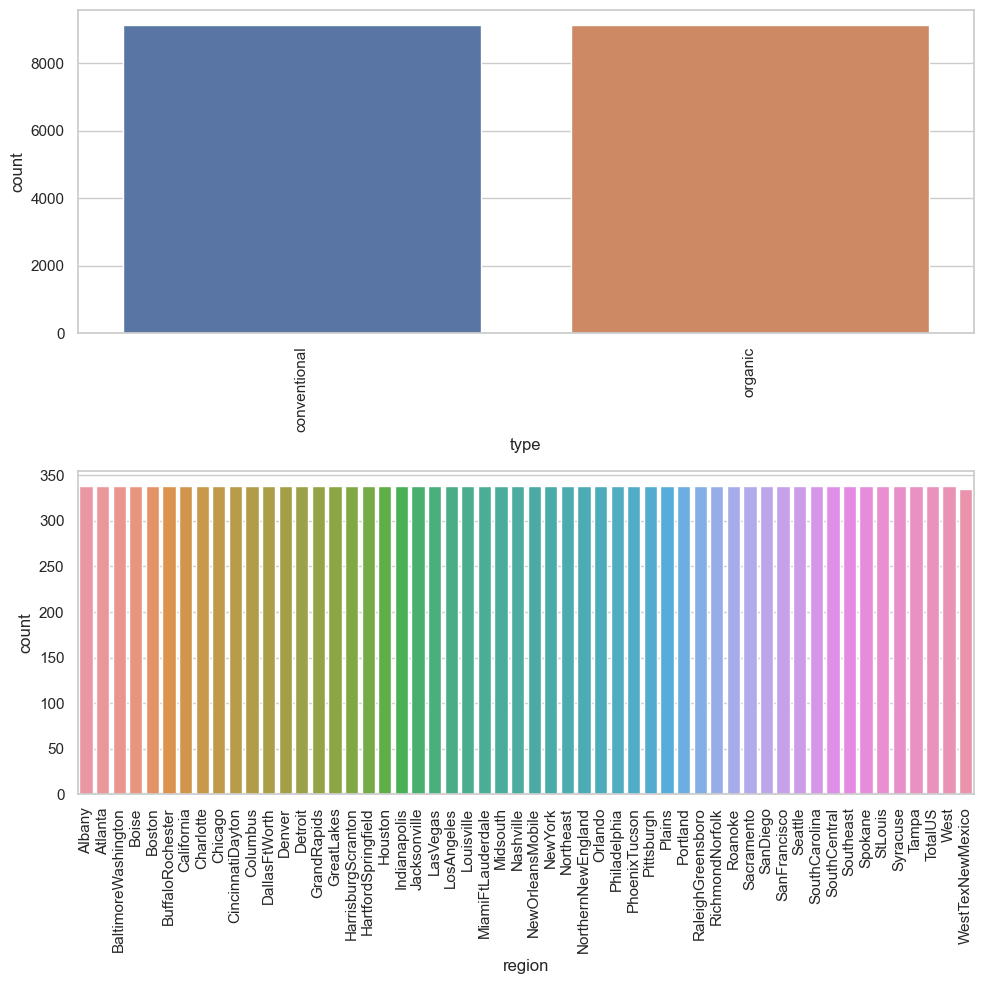

In [25]:
# Univariate analysis using Count plot for categorical columns
rows = 2
columns = 1
plt.figure(figsize = (10, 10))

for i in range(0, len(categorical_columns)):
    plt.subplot(rows, columns, i+1)
    sns.countplot(df[categorical_columns[i]]) 
    plt.xticks(rotation = 90)
    plt.tight_layout()

plt.show()

Count plots for categorical columns showing count of each unique values present in the categorical columns.

#### Histogram

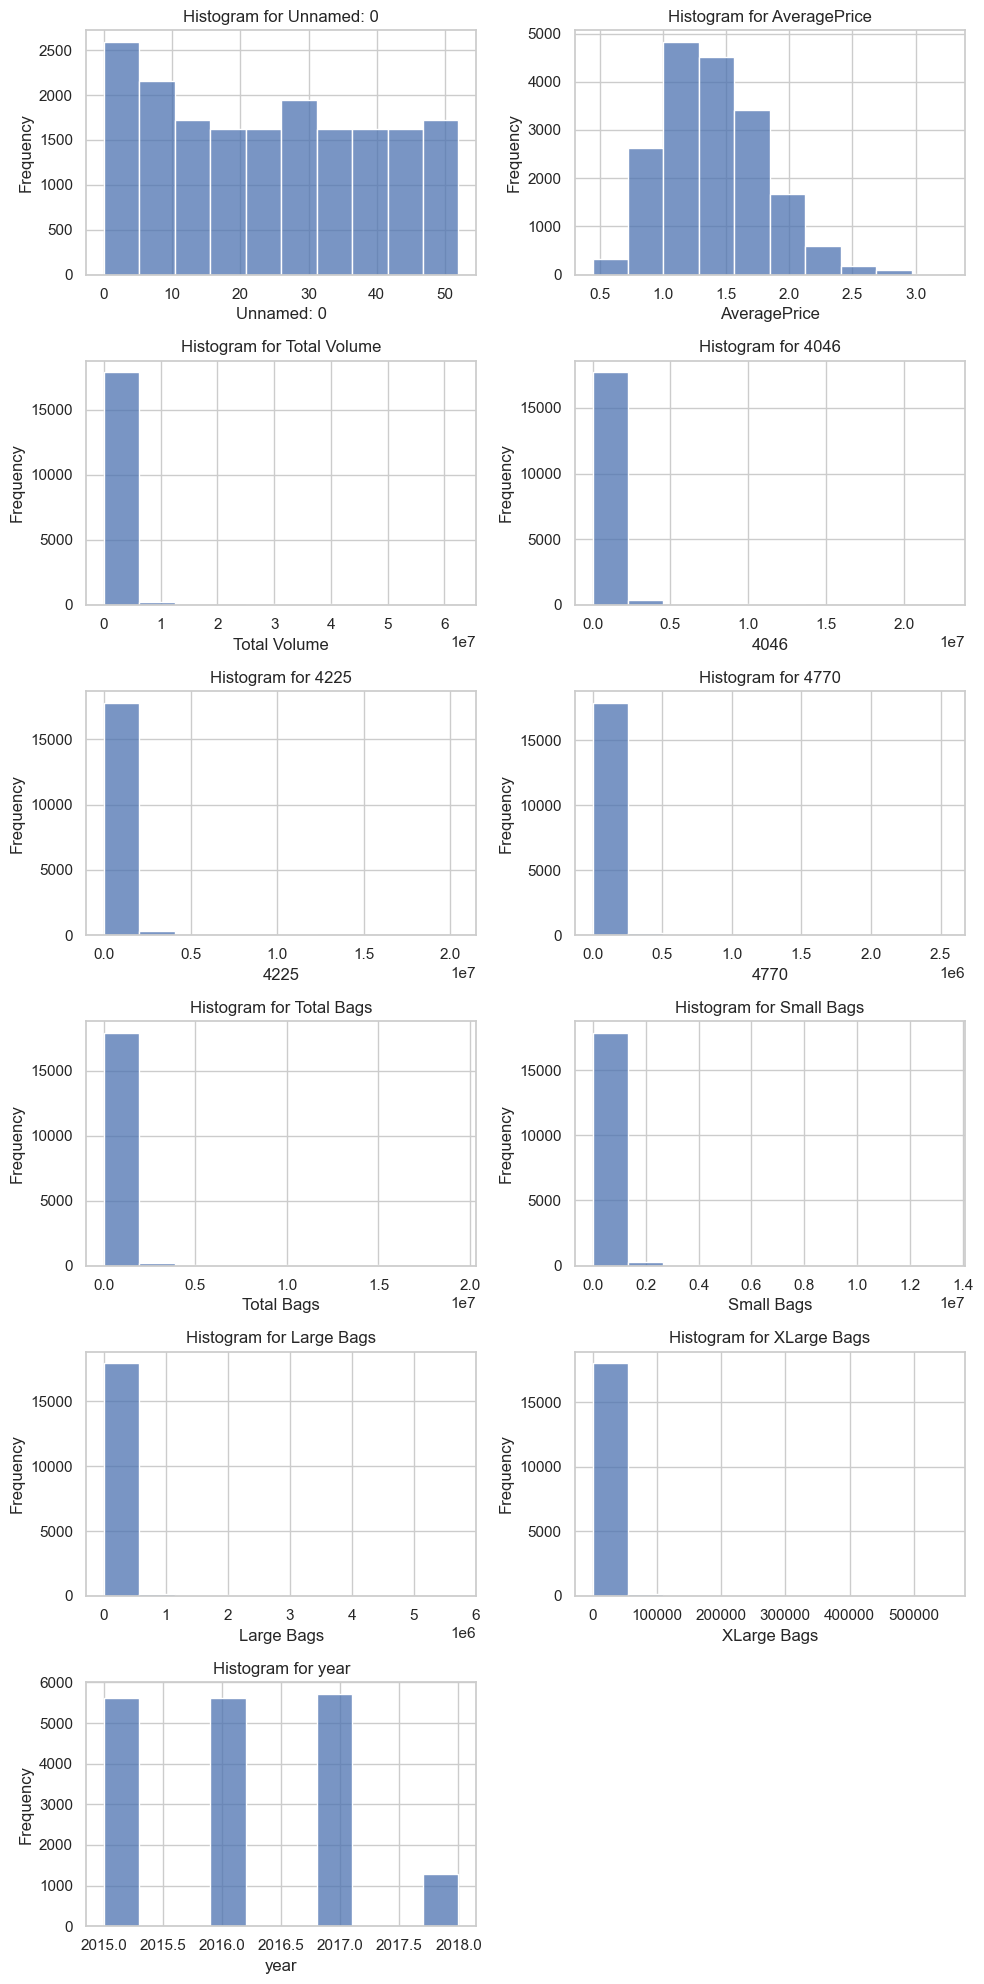

In [26]:
rows = 6
columns = 2

plt.figure(figsize = (10, 20))

for i in range(0, len(numerical_columns)):
    plt.subplot(rows, columns, i+1)
    sns.histplot(df[numerical_columns[i]], bins = 10) 
    plt.title("Histogram for " + numerical_columns[i])
    plt.ylabel("Frequency")
    plt.tight_layout()

plt.show()

Histogrms for numerical columns showing frequency distributions of values in specific ranges.

### Bivariate Analysis

#### Scatter Plot

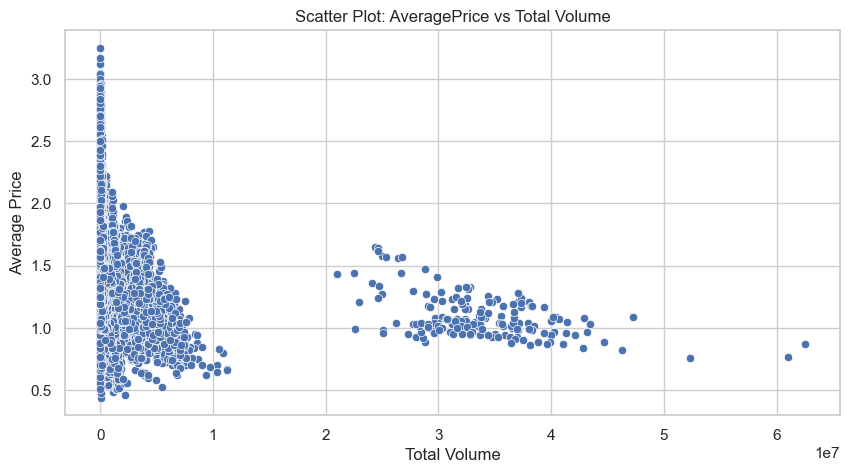

In [27]:
# Scatter plot for AveragePrice vs Total Volume
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'Total Volume', y = 'AveragePrice', data = df)
plt.title('Scatter Plot: AveragePrice vs Total Volume')
plt.xlabel('Total Volume')
plt.ylabel('Average Price')
plt.show()

Scatter plot shows the influenc of Total Volume over Average Price.

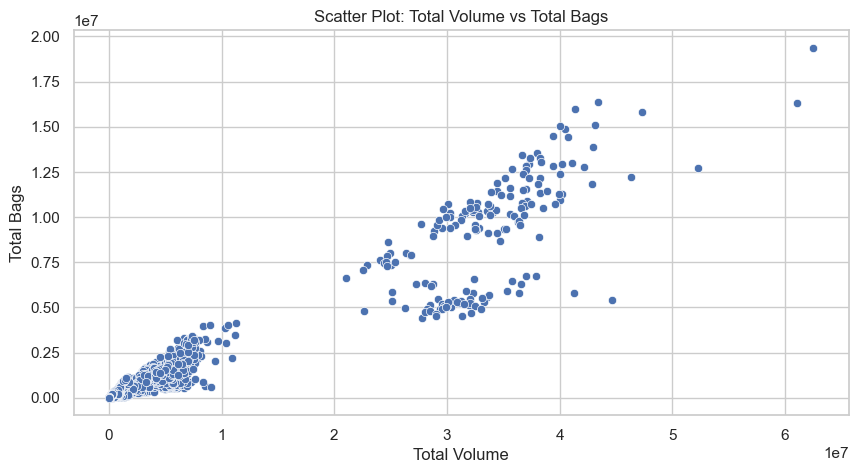

In [28]:
# Scatter plot for Total Volume vs Total Bags
plt.figure(figsize = (10, 5))
sns.scatterplot(x = 'Total Volume', y = 'Total Bags', data = df)
plt.title('Scatter Plot: Total Volume vs Total Bags')
plt.xlabel('Total Volume')
plt.ylabel('Total Bags')
plt.show()

Scatter plot shows the influenc of Total Volume over Total Bags.

#### Line Plot 

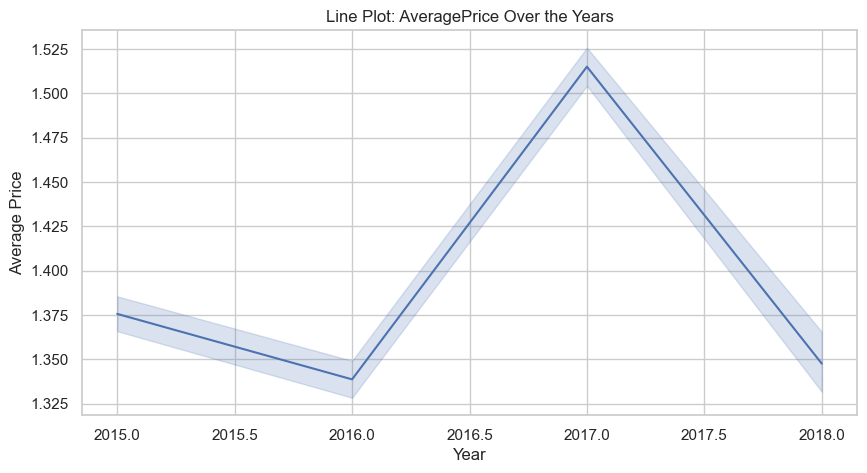

In [29]:
# Line plot for AveragePrice over the years
plt.figure(figsize = (10, 5))
sns.lineplot(x = 'year', y = 'AveragePrice', data = df)
plt.title('Line Plot: AveragePrice Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

Line plot shows the rise and fall in Average Price over the Years.

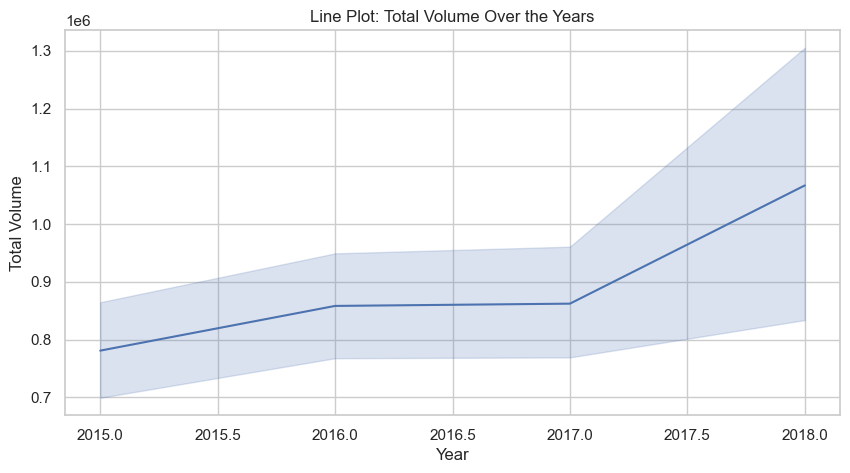

In [30]:
# Line plot for Total Volume over the years
plt.figure(figsize = (10, 5))
sns.lineplot(x = 'year', y = 'Total Volume', data = df)
plt.title('Line Plot: Total Volume Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Volume')
plt.show()

Line plot shows the rise and fall in Total Volume over the Years.

#### Bar graph

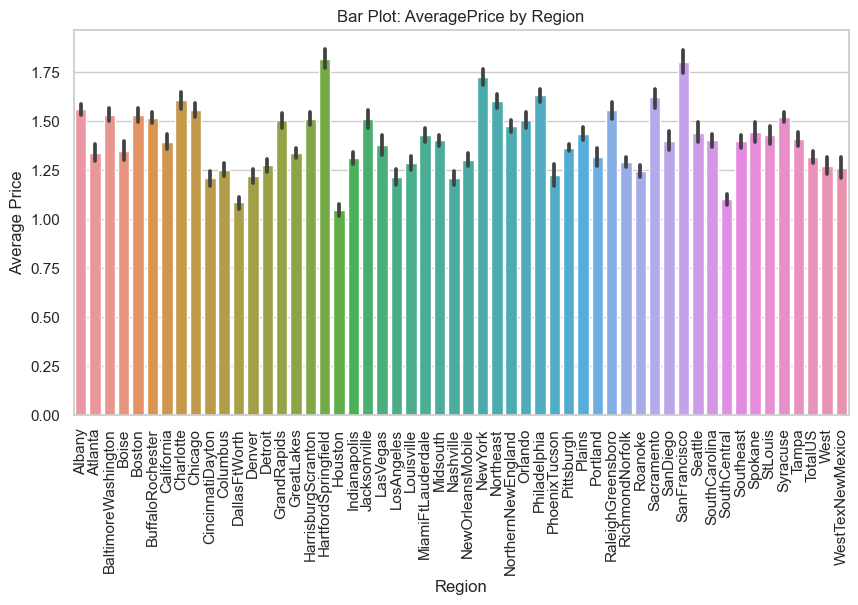

In [31]:
# Bar plot for AveragePrice by region
plt.figure(figsize = (10, 5))
sns.barplot(x = 'region', y = 'AveragePrice', data = df)
plt.title('Bar Plot: AveragePrice by Region')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.xticks(rotation = 90)
plt.show()

Bar graph visually illustrate the relationship between Region and Average Price.

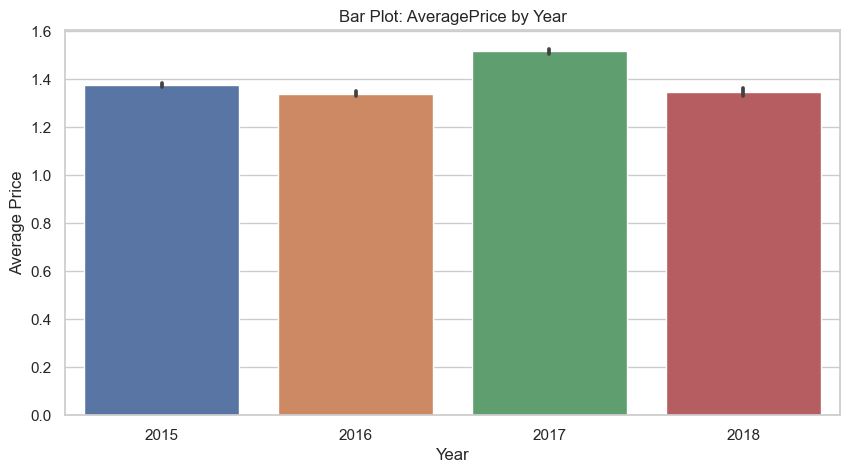

In [32]:
# Bar plot for AveragePrice by year
plt.figure(figsize = (10, 5))
sns.barplot(x = 'year', y = 'AveragePrice', data = df)
plt.title('Bar Plot: AveragePrice by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

Bar graph visually illustrate the relationship between Year and Average Price.

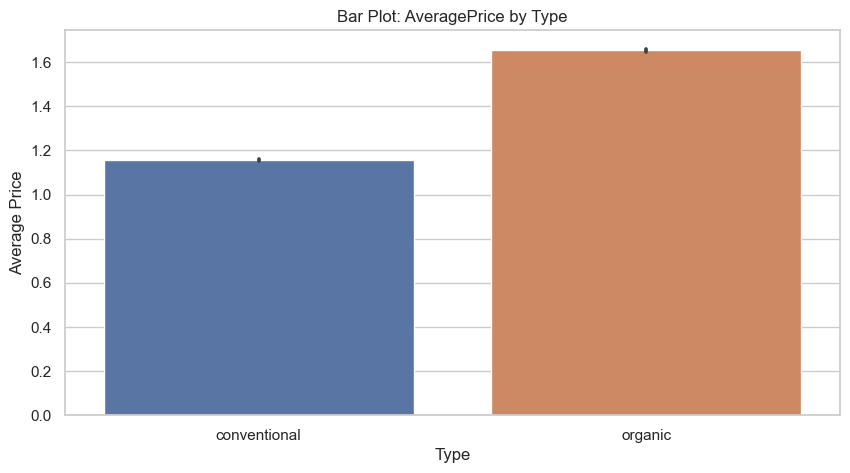

In [33]:
# Bar plot for AveragePrice by type
plt.figure(figsize=(10, 5))
sns.barplot(x='type', y='AveragePrice', data = df)
plt.title('Bar Plot: AveragePrice by Type')
plt.xlabel('Type')
plt.ylabel('Average Price')
plt.show()

Bar graph visually illustrate the relationship between Type and Average Price.

#### Pair Plot

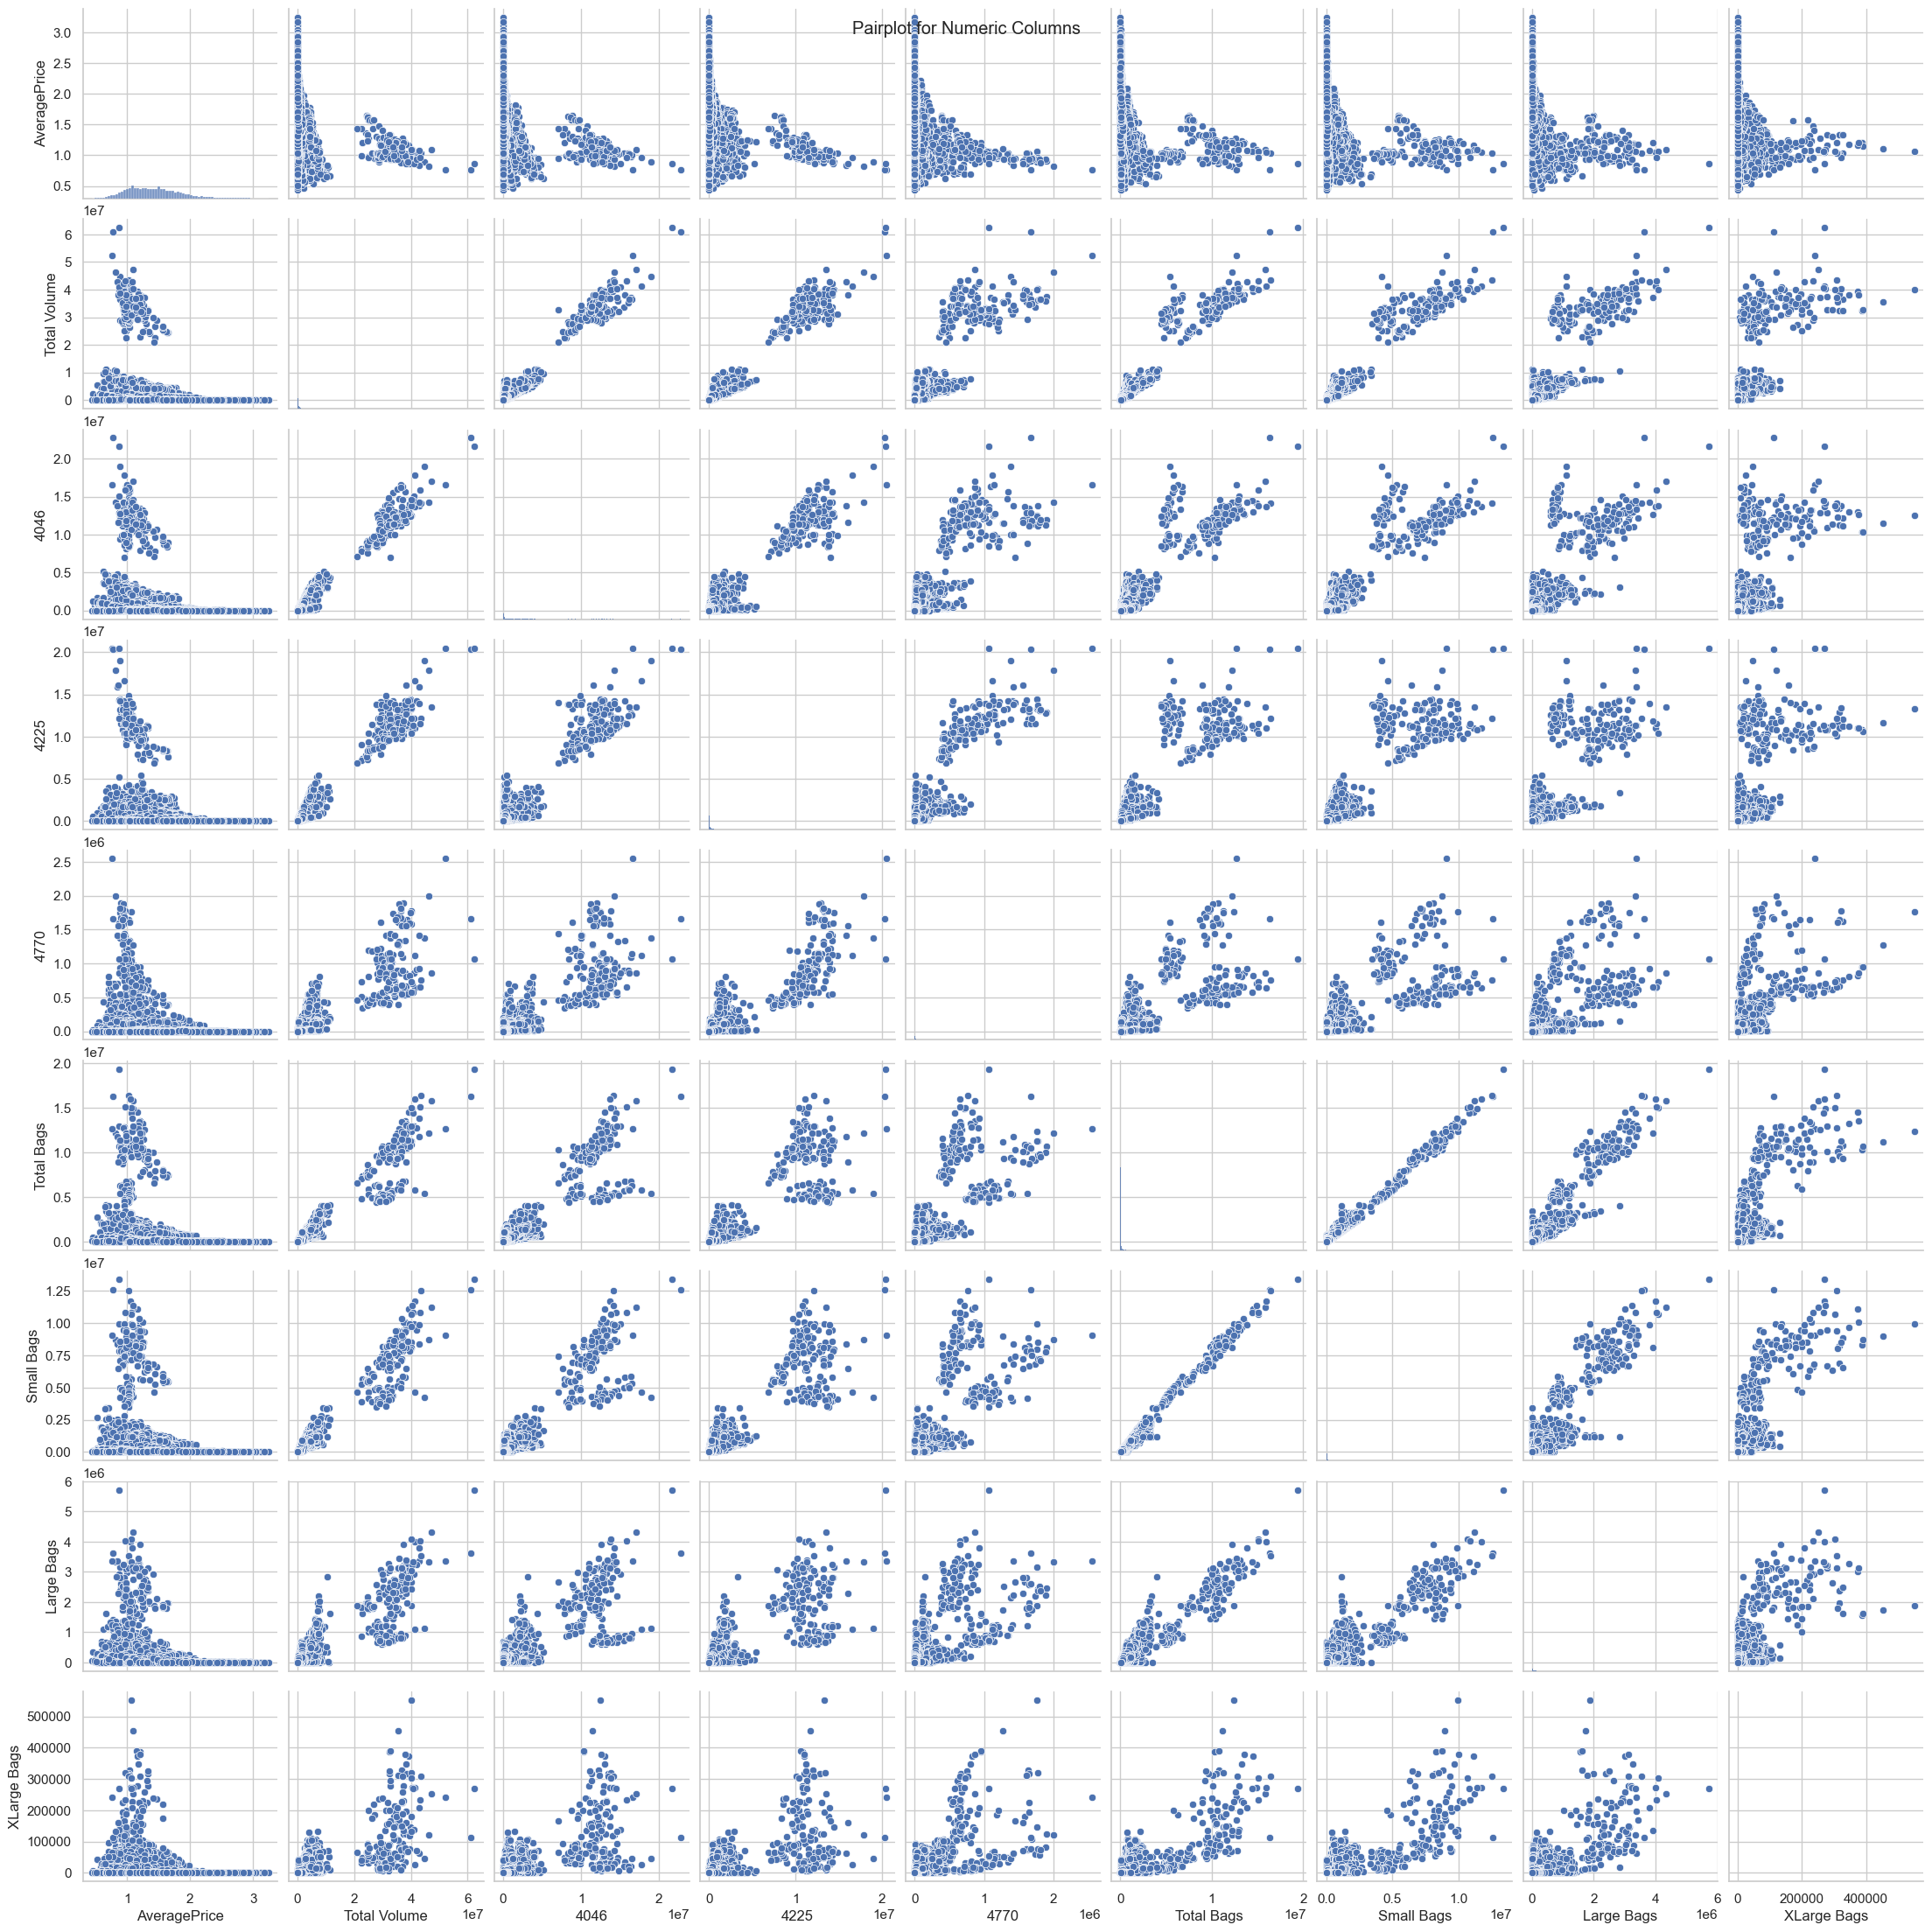

In [34]:
# Pairplot to visualize relationships between numeric columns
sns.pairplot(df[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']])
plt.suptitle('Pairplot for Numeric Columns')
plt.show()

Pair plot, specifically focused on numerical columns, offers a comprehensive visual exploration of the relationships between different numerical columns with each other.

### Multivariate Analysis

#### Bar Plot

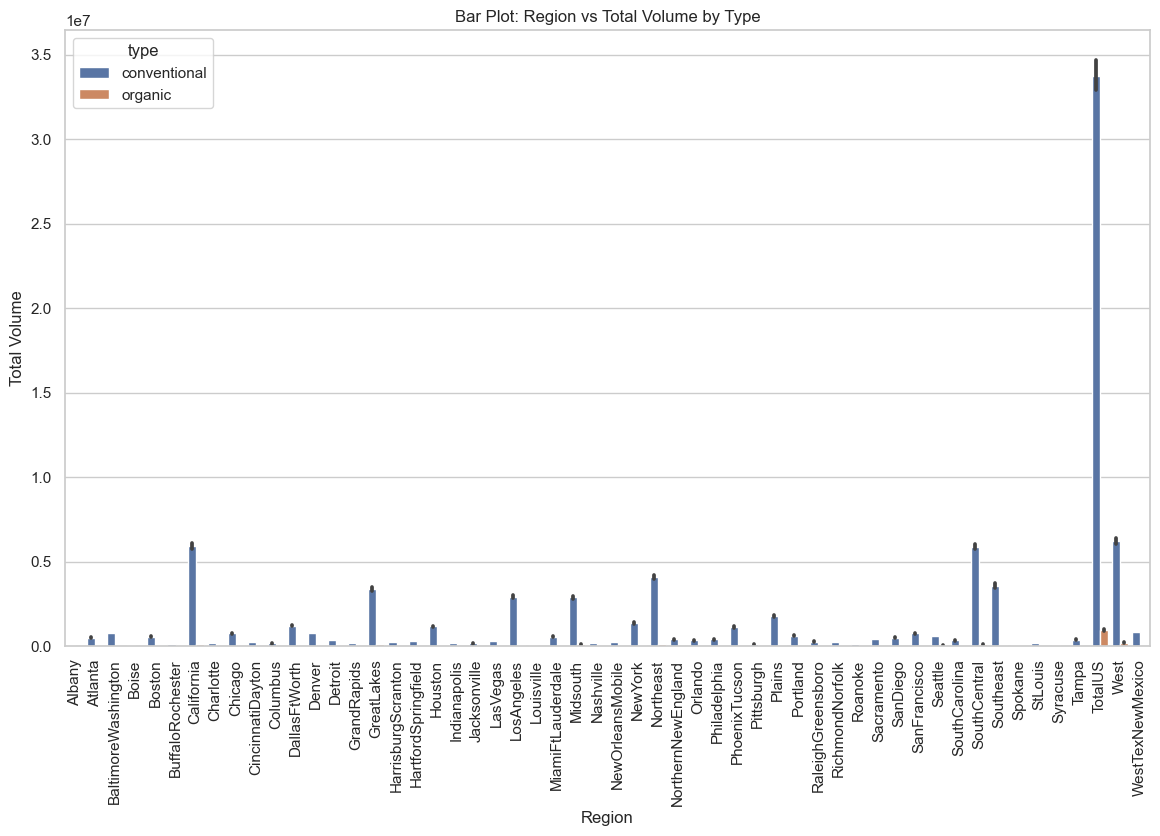

In [35]:
# Multivariate analysis using a bar plot for region vs Total Volume, segmented by type
plt.figure(figsize = (14, 8))
sns.barplot(x = 'region', y = 'Total Volume', hue = 'type', data = df)
plt.title('Bar Plot: Region vs Total Volume by Type')
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.xticks(rotation = 90)
plt.show()

Bar plot shows relationship between region and Total Volume, segmented by type,

Unnamed: 0: This column appears to be an index or identifier with values ranging from 0 to 52. It doesn't seem to provide meaningful information for your analysis, so removing it simplifies dataset without losing any valuable data.

Date: 'year' column already captures the temporal information, keeping the 'Date' column can introduce redundancy, so removing it simplifies dataset without losing any valuable data.

In [36]:
# Dropping 'Unnamed: 0' and 'Date' columns from the dataset
df.drop(columns = ['Unnamed: 0', 'Date'], inplace = True, axis = 1)

### Label Encoding

In [37]:
# Converting categorical columns into numerical columns
encoder = LabelEncoder()
for i in categorical_columns:
    df[i] = encoder.fit_transform(df[i])

In [38]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


### Storing this dataset separately for classification and regression tasks.

In [39]:
# For classification task
df_c = df.copy()

# For regression task
df_r = df.copy()

## Building Classification Model

### Features and target variable for classification model:

#### Features: 
AveragePrice, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year

#### Target variable:
region

In [40]:
# Display the dataset
df_c.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


## Data Preprocessing

### Checking for the outliers

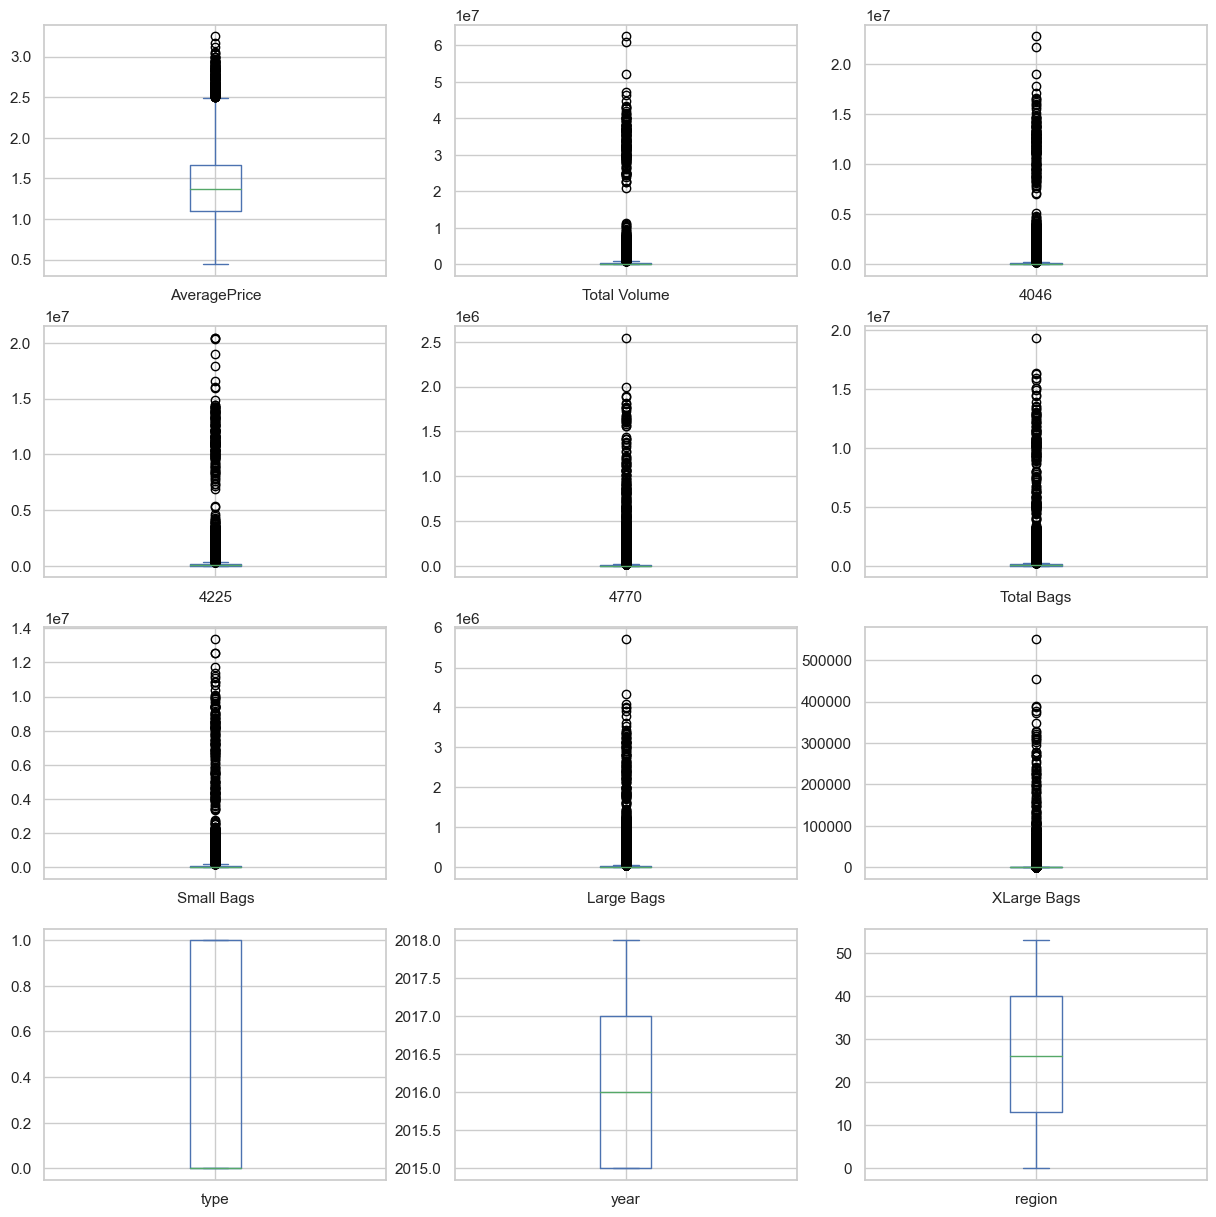

In [41]:
# Checking for the outliers using boxplot
df_c.plot(kind = 'box', subplots = True, figsize = (15, 15), layout = (4, 3))
plt.show()

Outliers are present in 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags' and 'XLarge Bags' columns.

In [42]:
# List of columns containing
columns_with_outliers = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags','Large Bags',
                        'XLarge Bags']

In [43]:
# Checking for the outliers using Z-Score
z_score = abs(zscore(df_c[columns_with_outliers]))
z_score

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.188689,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.139020,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,1.182069,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.809551,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.312861,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...,...
18244,0.556347,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.755023,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,1.152375,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,1.301382,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [44]:
# Identify the positions where the z-score is greater than 3
np.where(z_score > 3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([2, 2, 8, ..., 0, 0, 0], dtype=int64))

Outliers are present in these positions in the dataset.

In [45]:
# Removing Outliers
z = 3
updated_df_c = df_c[(z_score < z).all(axis = 1)]
updated_df_c

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [46]:
# Checking the shape of dataframe after removing the outliers
updated_df_c.shape

(17651, 12)

### Checking for the skewness 

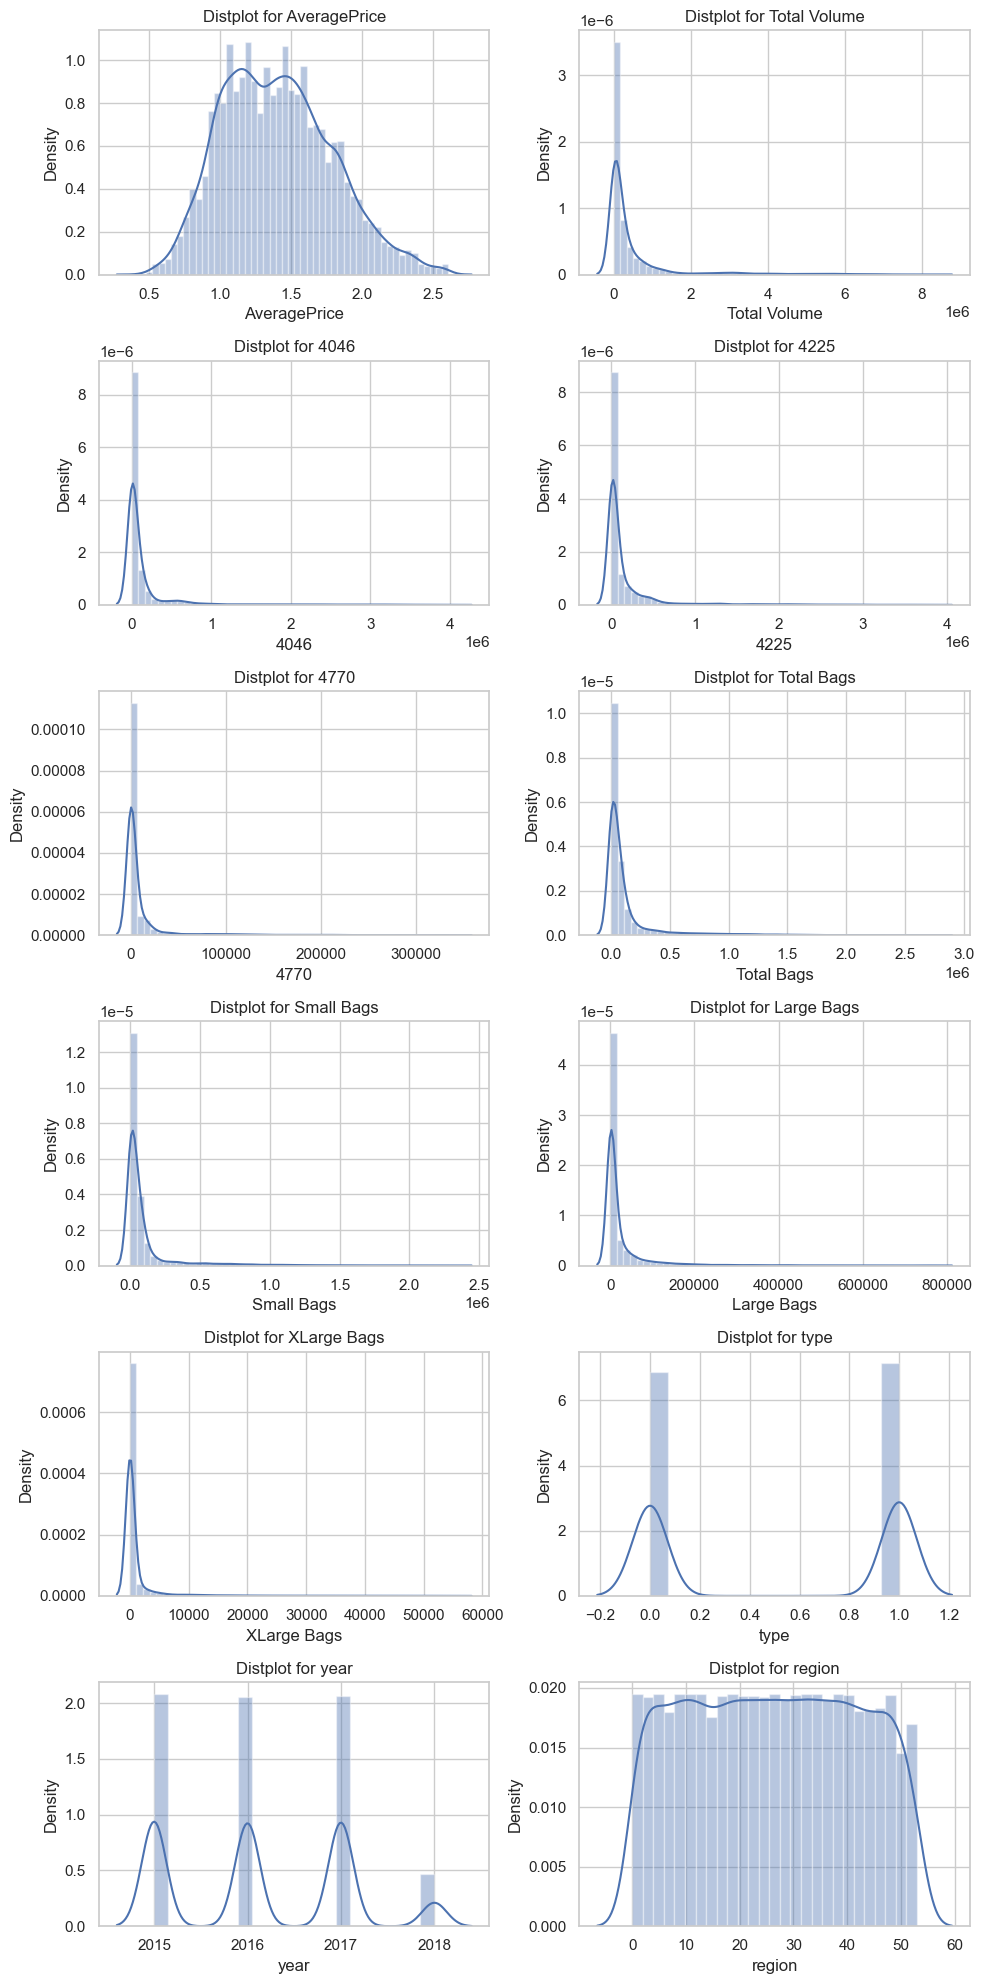

In [47]:
# Checking for the skewness using Dist plot 
ncol = 2
nrow = 6
plt.figure(figsize = (10, 20))

for i in range(0, len(updated_df_c.columns)):
    plt.subplot(nrow, ncol, i+1)
    sns.distplot(updated_df_c[updated_df_c.columns[i]]) 
    plt.title("Distplot for " + updated_df_c.columns[i]) 
    plt.tight_layout()

plt.show()

In majority of columns, skewness is present.

In [48]:
# Checking for the skewness using skew() method
updated_df_c.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
type           -0.037741
year            0.229976
region          0.012798
dtype: float64

Skewness is present 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' columns.

In [49]:
# List of the columns to be transformed
columns_to_transform = ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 
                        'XLarge Bags']

# Copying data
updated_df_c2 = updated_df_c.copy()

# Reduing skewnees using yeojohnson Transformation
for column in columns_to_transform: 
    transformed_data, lambda_value = yeojohnson(updated_df_c[column] + 1)
    updated_df_c2[column] = transformed_data

In [50]:
updated_df_c2[columns_to_transform].skew()

AveragePrice    0.007559
Total Volume   -0.008620
4046           -0.038112
4225           -0.045338
4770            0.056692
Total Bags     -0.022907
Small Bags     -0.027679
Large Bags     -0.096537
XLarge Bags     0.882562
dtype: float64

In [51]:
updated_df_c2.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.942899,11.857485,8.305709,17.893605,3.684863,12.524641,14.681925,5.501106,0.599919,0,2015,0
1,0.946495,11.677273,7.704664,17.398858,3.847715,12.689384,14.902399,5.563995,0.599919,0,2015,0
2,0.863834,12.558815,7.932647,19.691179,4.531282,12.403885,14.516777,5.644071,0.599919,0,2015,0
3,0.895191,12.094639,8.430192,18.602124,4.033607,11.789965,13.681955,6.019269,0.599919,0,2015,0
4,0.933774,11.594434,8.169870,17.354233,4.070292,11.901955,13.807099,6.600495,0.599919,0,2015,0


### Checking the Correlation Coefficient Matrix

In [52]:
# Checking the correalation coefficient matrix
correlation_coefficient = updated_df_c2.corr()
correlation_coefficient

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.586023,-0.566068,-0.460167,-0.504203,-0.567110,-0.491764,-0.489021,-0.393646,0.615620,0.092052,-0.004875
Total Volume,-0.586023,1.000000,0.890030,0.924957,0.817825,0.941350,0.906580,0.683264,0.627672,-0.799829,0.080702,0.068982
4046,-0.566068,0.890030,1.000000,0.765332,0.736974,0.801680,0.780643,0.604632,0.572170,-0.726267,0.001465,0.162744
4225,-0.460167,0.924957,0.765332,1.000000,0.796656,0.820937,0.787003,0.616658,0.583299,-0.747891,-0.001553,0.034248
4770,-0.504203,0.817825,0.736974,0.796656,1.000000,0.760134,0.754382,0.547184,0.615953,-0.779837,-0.050497,0.039346
Total Bags,-0.567110,0.941350,0.801680,0.820937,0.760134,1.000000,0.950453,0.730048,0.612019,-0.725058,0.214765,0.071542
Small Bags,-0.491764,0.906580,0.780643,0.787003,0.754382,0.950453,1.000000,0.566791,0.602622,-0.720175,0.190412,0.057606
Large Bags,-0.489021,0.683264,0.604632,0.616658,0.547184,0.730048,0.566791,1.000000,0.450764,-0.500015,0.190147,0.089522
XLarge Bags,-0.393646,0.627672,0.572170,0.583299,0.615953,0.612019,0.602622,0.450764,1.000000,-0.661220,0.162447,-0.020451
type,0.615620,-0.799829,-0.726267,-0.747891,-0.779837,-0.725058,-0.720175,-0.500015,-0.661220,1.000000,0.003867,0.018409


Let's use the heatmap to visualize and interpret the correlation coefficient matrix.

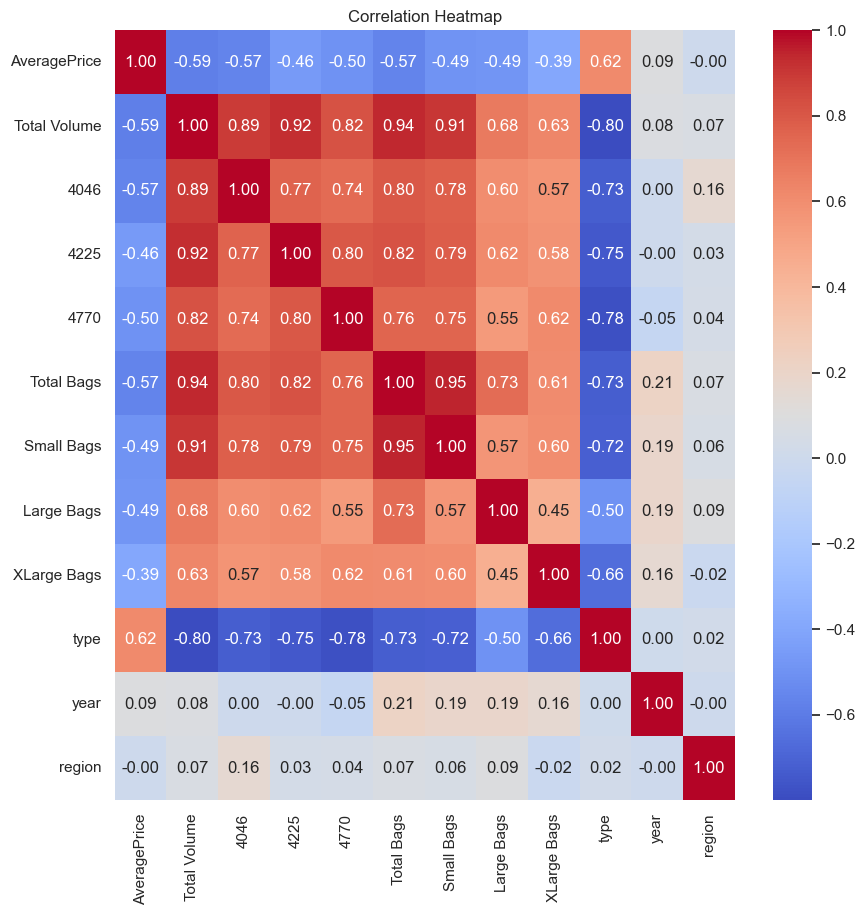

In [53]:
# Plotting the heatmap for correlation coefficient matrix
plt.figure(figsize = (10, 10))
sns.heatmap(correlation_coefficient, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

#### Observations:

AveragePrice has a strong negative correlation (-0.586) with Total Volume, suggesting that as the average price of a product decreases, the total volume of sales tends to increase.

Total Volume is strongly positively correlated (0.890) with 4046, indicating a strong association between the total volume of sales and the sales of product 4046.

Product 4770 has a moderate positive correlation (0.797) with Total Bags, suggesting that as sales of product 4770 increase, the total number of bags used tends to increase.

Large Bags and Small Bags have a strong positive correlation (0.951), indicating that the sales of both large and small bags tend to move together.

Type has a moderate positive correlation (0.616) with AveragePrice, implying that the type of product may influence its average price.

Year has a weak positive correlation (0.092) with AveragePrice, suggesting a slight upward trend in average prices over the years.

Region shows a very weak negative correlation (-0.005) with AveragePrice, indicating that there is little to no relationship between the region and the average price of products.

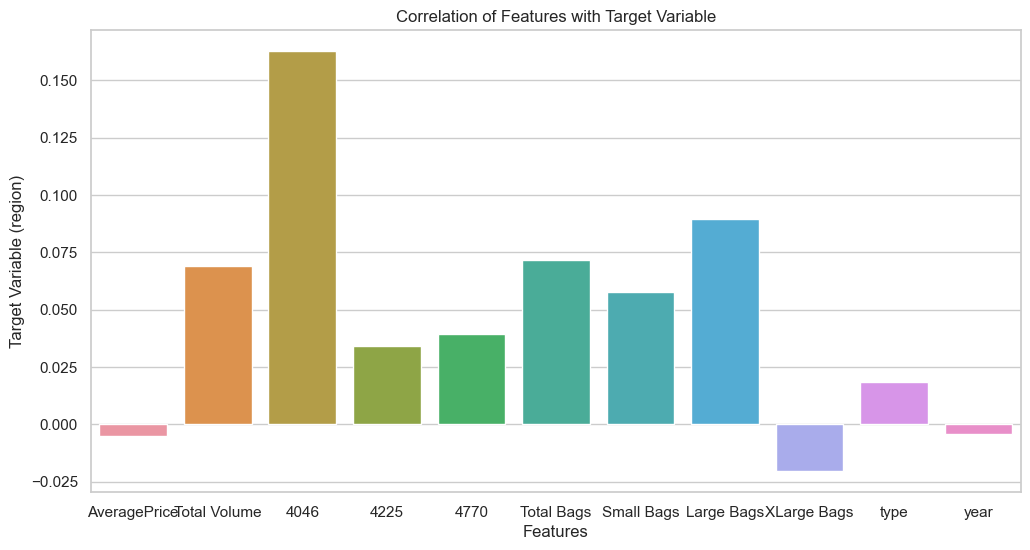

In [54]:
# Checking for the correlation between features and target variable separately
target = 'region'

correlation_matrix = updated_df_c2.corr()
correlations_with_target = correlation_matrix[target].drop(target)

plt.figure(figsize=(12, 6))
sns.barplot(x = correlations_with_target.index, y = correlations_with_target.values)
plt.xlabel('Features')
plt.ylabel('Target Variable (region)')
plt.title('Correlation of Features with Target Variable')

plt.show()

Here's a concise overview of the correlations between the dependent variable (Region) and each independent variable along with their corresponding values:

AveragePrice: Strong negative correlation (-0.004875)

Total Volume: Weak positive correlation (0.068982)

4046: Weak positive correlation (0.162744)

4225: Slight positive correlation (0.034248)

4770: Slight positive correlation (0.039346)

Total Bags: Weak positive correlation (0.071542)

Small Bags: Slight positive correlation (0.057606)

Large Bags: Slight positive correlation (0.089522)

XLarge Bags: Weak negative correlation (-0.020451)

Type: Negligible correlation (0.018409)

Year: Very weak positive correlation (0.003867)

## Feature Engineering

In [55]:
# Extracting features and target from the dataset
features = updated_df_c2.drop(columns = 'region')
target = updated_df_c2['region']

### Feature Scaling

In [56]:
# Performing standard scaling on the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(features)

In [57]:
updated_features = pd.DataFrame(scaled_df, columns = features.columns[:])
updated_features.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year
0,-0.119638,-0.075323,-0.660038,0.353385,-0.266879,-0.537086,-0.345351,-0.806925,-0.672665,-1.019047,-1.210013
1,-0.065989,-0.147500,-0.781806,0.271477,-0.215778,-0.497633,-0.309067,-0.796570,-0.672665,-1.019047,-1.210013
2,-1.299261,0.205566,-0.735618,0.650985,-0.001284,-0.566005,-0.372531,-0.783386,-0.672665,-1.019047,-1.210013
3,-0.831425,0.019659,-0.634819,0.470685,-0.157448,-0.713026,-0.509922,-0.721611,-0.672665,-1.019047,-1.210013
4,-0.255792,-0.180678,-0.687558,0.264089,-0.145937,-0.686207,-0.489326,-0.625913,-0.672665,-1.019047,-1.210013


### Checking for the Variance Inflation Factor

In [58]:
# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

        Features        VIF
0   AveragePrice   2.132378
1   Total Volume  55.793071
2           4046   6.992993
3           4225  12.528350
4           4770   3.934804
5     Total Bags  36.328242
6     Small Bags  17.770636
7     Large Bags   3.510510
8    XLarge Bags   2.022151
9           type   4.090853
10          year   1.407317


'Total Volume' feature has highest VIF value (54.085476). Let's drop this and then recalculate the VIF values.

In [59]:
# Dropping 'Total Volume' feature
updated_features.drop('Total Volume', inplace = True, axis = 1)

In [60]:
# Again calculating the VIF
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

       Features        VIF
0  AveragePrice   2.073088
1          4046   3.624211
2          4225   4.606887
3          4770   3.924319
4    Total Bags  27.106855
5    Small Bags  17.753114
6    Large Bags   3.459355
7   XLarge Bags   2.010686
8          type   3.966158
9          year   1.407280


This time 'Total Bags' feature has highest VIF value (26.986781). Let's drop this and then recalculate the VIF values.

In [61]:
# Dropping 'Total Bags' feature
updated_features.drop('Total Bags', inplace = True, axis = 1)

In [62]:
# Again calculating the VIF
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

       Features       VIF
0  AveragePrice  1.914756
1          4046  3.619822
2          4225  4.321235
3          4770  3.923840
4    Small Bags  4.145557
5    Large Bags  2.039165
6   XLarge Bags  2.010668
7          type  3.943791
8          year  1.356416


Now all the features exhibit less VIF values that shows the multicollinearty issue has been resolved.

## Model Building

In [63]:
# Storing the features and target variables in X1 and y1
X1 = updated_features
y1 = target

### Checking for the Class Imbalance Problem

In [64]:
y1.value_counts()

0     338
16    338
49    338
44    338
39    338
38    338
35    338
34    338
32    338
30    338
26    338
23    338
19    338
18    338
27    338
8     338
2     338
13    338
12    338
11    338
4     338
5     338
10    338
9     338
20    337
1     337
28    337
33    336
41    336
40    336
14    336
50    336
31    335
24    335
25    333
48    333
21    333
53    332
7     332
22    331
17    331
36    330
3     329
37    328
47    328
43    326
29    325
46    307
42    301
45    292
6     290
15    272
52    256
51    169
Name: region, dtype: int64

Yes class imbalance problem is there in the dataset.

In [65]:
# Applying oversampling 
smote = SMOTE()

# Apply SMOTE to the dataset
X, y = smote.fit_resample(X1, y1)

In [66]:
y.value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
52    338
53    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
51    338
Name: region, dtype: int64

Now all the calsses are balanced

### Finding a best random state

In [67]:
# Function to find the best random state
def find_best_random_state(X, y, iterations = 100):
    max_accuracy_score = 0
    max_random_state = 0
    
    for i in range(1, iterations + 1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i)
        rfc = RandomForestClassifier(random_state = i)
        rfc.fit(X_train, y_train)
        pred = rfc.predict(X_test)
        accuracy = accuracy_score(y_test, pred)
        
        if accuracy > max_accuracy_score:
            max_accuracy_score = accuracy
            max_random_state = i 
    
    return max_accuracy_score, max_random_state

# Calling the function to find the best random state
best_accuracy_score, best_random_state = find_best_random_state(X, y)

print("Best Accuracy score is", best_accuracy_score, "at random state", best_random_state)

Best Accuracy score is 0.9192841490138788 at random state 28


### Spliting dataset into training and testing sets

In [68]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = best_random_state)

### List of different models

In [69]:
models_name = ['Logistic Regression', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Support Vector Classifier', 
               'Decision Tree Classifier', 'Random Forest Classifier', 'Extra Trees Classifier', 
               'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Bagging Classifier', 'XGBoost Classifier']

In [70]:
models = [LogisticRegression(), 
          KNeighborsClassifier(), 
          GaussianNB(),
          SVC(), 
          DecisionTreeClassifier(),
          RandomForestClassifier(), 
          ExtraTreesClassifier(), 
          GradientBoostingClassifier(), 
          AdaBoostClassifier(), 
          BaggingClassifier(),
          xgb.XGBClassifier()]

In [71]:
models_accuracy_score = [] # List for storing accuracy score of each model
i = 0
for model in models:
    print(models_name[i])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)*100
    models_accuracy_score.append(accuracy)
    print("Accuracy score:", accuracy)
    print("Classifiction report:\n", classification_report(y_test, y_pred))
    print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    print('\n\n')
    i += 1

Logistic Regression
Accuracy score: 50.40175310445581
Classifiction report:
               precision    recall  f1-score   support

           0       0.49      0.57      0.53       105
           1       0.21      0.47      0.29        90
           2       0.61      0.64      0.63        98
           3       0.61      0.51      0.56       102
           4       0.51      0.47      0.49       110
           5       0.53      0.45      0.49        92
           6       0.84      0.83      0.84       105
           7       0.59      0.67      0.63       109
           8       0.66      0.72      0.69        99
           9       0.57      0.74      0.64       111
          10       0.53      0.32      0.40       107
          11       0.52      0.51      0.52       105
          12       0.50      0.47      0.48       105
          13       0.26      0.24      0.25        95
          14       0.49      0.47      0.48       102
          15       0.71      0.72      0.71        93
    

Accuracy score: 81.0262965668371
Classifiction report:
               precision    recall  f1-score   support

           0       0.70      0.91      0.79       105
           1       0.48      0.69      0.57        90
           2       0.95      0.97      0.96        98
           3       0.82      0.74      0.78       102
           4       0.93      0.87      0.90       110
           5       0.84      0.72      0.77        92
           6       1.00      0.94      0.97       105
           7       0.79      0.84      0.82       109
           8       0.96      0.97      0.96        99
           9       0.83      0.74      0.78       111
          10       0.59      0.66      0.63       107
          11       0.84      0.90      0.87       105
          12       0.96      0.93      0.95       105
          13       0.54      0.75      0.63        95
          14       0.83      0.92      0.87       102
          15       0.96      0.99      0.97        93
          16       0.96  

Accuracy score: 93.3345507669832
Classifiction report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92       105
           1       0.85      0.90      0.88        90
           2       0.98      1.00      0.99        98
           3       0.94      0.93      0.94       102
           4       0.96      0.98      0.97       110
           5       0.87      0.84      0.85        92
           6       0.99      1.00      1.00       105
           7       0.92      0.98      0.95       109
           8       0.99      0.99      0.99        99
           9       0.90      0.96      0.93       111
          10       0.91      0.90      0.90       107
          11       0.97      0.97      0.97       105
          12       1.00      0.98      0.99       105
          13       0.87      0.91      0.89        95
          14       0.92      0.94      0.93       102
          15       0.99      0.99      0.99        93
          16       0.96  

Accuracy score: 85.97516435354274
Classifiction report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87       105
           1       0.71      0.86      0.78        90
           2       0.89      0.95      0.92        98
           3       0.87      0.88      0.88       102
           4       0.84      0.90      0.87       110
           5       0.76      0.79      0.78        92
           6       0.93      0.99      0.96       105
           7       0.86      0.93      0.89       109
           8       0.92      0.98      0.95        99
           9       0.87      0.94      0.90       111
          10       0.71      0.79      0.75       107
          11       0.90      0.94      0.92       105
          12       0.89      0.89      0.89       105
          13       0.85      0.81      0.83        95
          14       0.85      0.87      0.86       102
          15       0.95      0.97      0.96        93
          16       0.92 

Logistic Regression: Achieves an accuracy score of 50.86%, indicating moderate predictive capability.

K-Nearest Neighbors (KNN): Performs well with an accuracy score of 84.02%, suggesting strong predictive performance.

Gaussian Naive Bayes: Shows poor performance with a low accuracy score of 7.99%, indicating limited predictive capability.

Support Vector Classifier (SVC): Performs well with an accuracy score of 81.81%, suggesting good predictive accuracy.

Decision Tree Classifier: Achieves an accuracy score of 79.62%, indicating reasonable predictive capability.

Random Forest Classifier: Performs very well with a high accuracy score of 91.93%, demonstrating strong predictive performance.

Extra Trees Classifier: Also performs excellently with an accuracy score of 92.97%, indicating robust predictive capability.

Gradient Boosting Classifier: Achieves an accuracy score of 84.02%, suggesting strong predictive performance.

AdaBoost Classifier: Shows poor performance with a low accuracy score of 7.30%, indicating limited predictive capability.

Bagging Classifier: Performs well with an accuracy score of 86.61%, indicating good predictive accuracy.

XGBoost Classifier: Demonstrates strong predictive performance with a high accuracy score of 89.52%.

### Cross Validation

In [72]:
i = 0
diff_acc_cv = [] # List for storing difference between the accuracy score and the mean of cross validation scores
for model in models:
    print(models_name[i])
    print("Accuracy Score:", models_accuracy_score[i])
    cv_score = cross_val_score(model, X, y)
    print("Cross Validation Scores:", cv_score*100)
    print("Mean of Cross Validation Scores:", cv_score.mean()*100)
    diff = models_accuracy_score[i] - cv_score.mean()*100
    print("Difference between Accuracy Score and Cross Validation Score:", diff)
    diff_acc_cv.append(diff)
    print('\n')
    i += 1

Logistic Regression
Accuracy Score: 50.40175310445581
Cross Validation Scores: [34.81238017 37.85264311 46.65753425 43.28767123 32.32876712]
Mean of Cross Validation Scores: 38.987799176806504
Difference between Accuracy Score and Cross Validation Score: 11.413953927649302


K-Nearest Neighbors
Accuracy Score: 83.69247626004382
Cross Validation Scores: [59.92878663 53.87565051 63.78082192 51.17808219 43.09589041]
Mean of Cross Validation Scores: 54.37184633221148
Difference between Accuracy Score and Cross Validation Score: 29.320629927832336


Gaussian Naive Bayes
Accuracy Score: 8.016800584368152
Cross Validation Scores: [5.56012051 2.60202684 6.21917808 5.80821918 5.34246575]
Mean of Cross Validation Scores: 5.106402074117431
Difference between Accuracy Score and Cross Validation Score: 2.9103985102507206


Support Vector Classifier
Accuracy Score: 81.0262965668371
Cross Validation Scores: [65.89975349 72.74719255 71.23287671 64.93150685 47.17808219]
Mean of Cross Validation Scores:

Random Forest, Extra Trees, and XGBoost classifiers are strong candidates based on their high accuracy scores and relatively small differences between accuracy and cross-validation scores but Extra Trees Classifier has the highest accuracy score and lowest difference between accuracy and cross-validation.

In [73]:
# Storing the performance summary of all the models
models_performance = pd.DataFrame({'Model': models_name, 
                  'Accurccy Score': models_accuracy_score, 
                  'Difference: Accuracy Score & CV Score': diff_acc_cv})

In [74]:
models_performance

,Model,Accurccy Score,Difference: Accuracy Score & CV Score
0,Logistic Regression,50.401753,11.413954
1,K-Nearest Neighbors,83.692476,29.320630
2,Gaussian Naive Bayes,8.016801,2.910399
3,Support Vector Classifier,81.026297,16.628414
4,Decision Tree Classifier,79.601899,21.948442
5,Random Forest Classifier,91.764061,19.350695
6,Extra Trees Classifier,93.334551,20.159652
7,Gradient Boosting Classifier,83.582907,19.869809
8,AdaBoost Classifier,7.724617,1.445615
9,Bagging Classifier,85.975164,20.755364


## Final Model
After careful evaluation, Extra Trees Classifier stands out as the best model and will serve as the final model because Extra Trees Classifier has the highest accuracy score and lowest difference between accuracy and cross-validation.

## Hyper Parameter Tuning

In [75]:
# Parameters grid for hyper parameter tuning
parameters_grid = {
    'n_estimators': [100, 200, 300],  # Number of decision trees in the ensemble
    'max_depth': [None, 10, 20],      # Maximum depth of each decision tree (or None for unlimited depth)
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

In [76]:
# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(ExtraTreesClassifier(), param_grid = parameters_grid, cv = 5, scoring = 'accuracy')

In [77]:
# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [78]:
# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [79]:
# Storing the best parameters
best_params = grid_search_cv.best_params_

In [80]:
# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

0.9201624970523292

In [81]:
# Creating final model
final_model = ExtraTreesClassifier(**best_params)
final_model.fit(X_train, y_train)
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy*100)

93.38933528122718


Final model has given Accuracy Score: 93.38%

## Saving the final model

In [82]:
# Saving the model 
joblib.dump(final_model, "Avocado_Region_Prediciton_Model.pkl")

['Avocado_Region_Prediciton_Model.pkl']

In [83]:
# Loading the saved model
model = joblib.load("Avocado_Region_Prediciton_Model.pkl")

# Predicting values
predicted_values = model.predict(X_test)

In [84]:
# Saving the actual values
actual_values = np.array(y_test)

In [85]:
# Comparing the actual and predicted values
actual_vs_predicted = pd.DataFrame({'Actual Vlaues' : actual_values , 'Predicted Values' : predicted_values})
actual_vs_predicted

,Actual Vlaues,Predicted Values
0,13,9
1,51,51
2,12,12
3,18,18
4,28,28
...,...,...
5471,21,21
5472,36,43
5473,15,15
5474,22,22


## Building Regression Model

### Features and target variable for regression model:

#### Features: 
Date, Total Volume, 4046, 4225, 4770, Total Bags, Small Bags, Large Bags, XLarge Bags, type, year, region

#### Target variable:
AveragePrice

In [86]:
# Display the dataset
df_r.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


## Data Preprocessing

### Cheking for the outliers

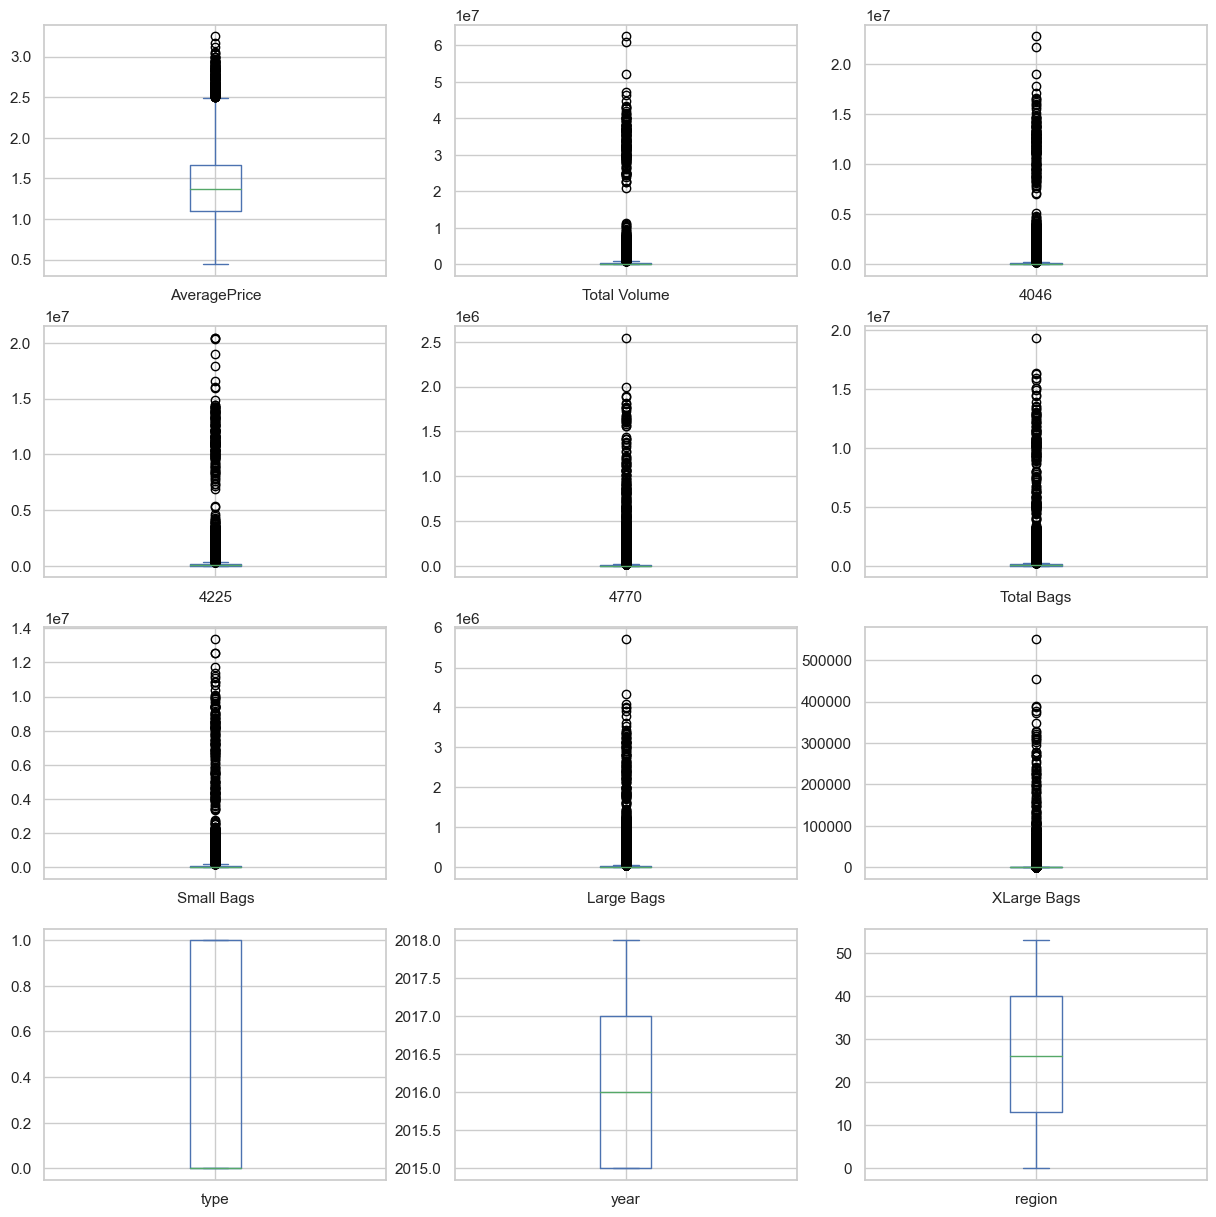

In [87]:
# # Checking for the outliers using boxplotb
df_r.plot(kind = 'box', subplots = True, figsize = (15, 15), layout = (4, 3))
plt.show()

Outliers are present in 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' columns but 'AveragePrice' is a target variable so it will not be taken for outliers removal.

In [88]:
# List of columns containing outliers
columns_with_outliers = ['Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags','Large Bags',
                        'XLarge Bags']

In [89]:
# Checking for the outliers using Z-Score
z_score = abs(zscore(df_r[columns_with_outliers]))
z_score

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,0.227716,0.230816,0.199902,0.212091,0.234170,0.232647,0.222352,0.17558
1,0.230427,0.231103,0.208054,0.211997,0.233350,0.231568,0.222335,0.17558
2,0.212085,0.231007,0.154478,0.211325,0.234730,0.233399,0.222311,0.17558
3,0.223444,0.230741,0.185350,0.211864,0.237096,0.236568,0.222186,0.17558
4,0.231538,0.230891,0.208719,0.211834,0.236718,0.236154,0.221924,0.17558
...,...,...,...,...,...,...,...,...
18244,0.241373,0.230017,0.243857,0.212540,0.229301,0.226665,0.220964,0.17558
18245,0.242296,0.230693,0.242277,0.212540,0.233594,0.232196,0.221403,0.17558
18246,0.242331,0.230693,0.243090,0.205766,0.233463,0.231644,0.222561,0.17558
18247,0.241625,0.230428,0.242651,0.205774,0.231866,0.229543,0.222529,0.17558


In [90]:
# Identify the positions where the z-score is greater than 3
np.where(z_score > 3)

(array([ 346,  359,  780, ..., 9111, 9112, 9113], dtype=int64),
 array([1, 1, 7, ..., 6, 6, 6], dtype=int64))

Outliers are present in these positions in the dataset.

In [91]:
# Removing Outliers
z = 3
updated_df_r = df_r[(z_score < z).all(axis = 1)]
updated_df_r

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,53


In [92]:
# Checking the shape of dataframe after removing the outliers
updated_df_r.shape

(17782, 12)

### Checking for the skewness

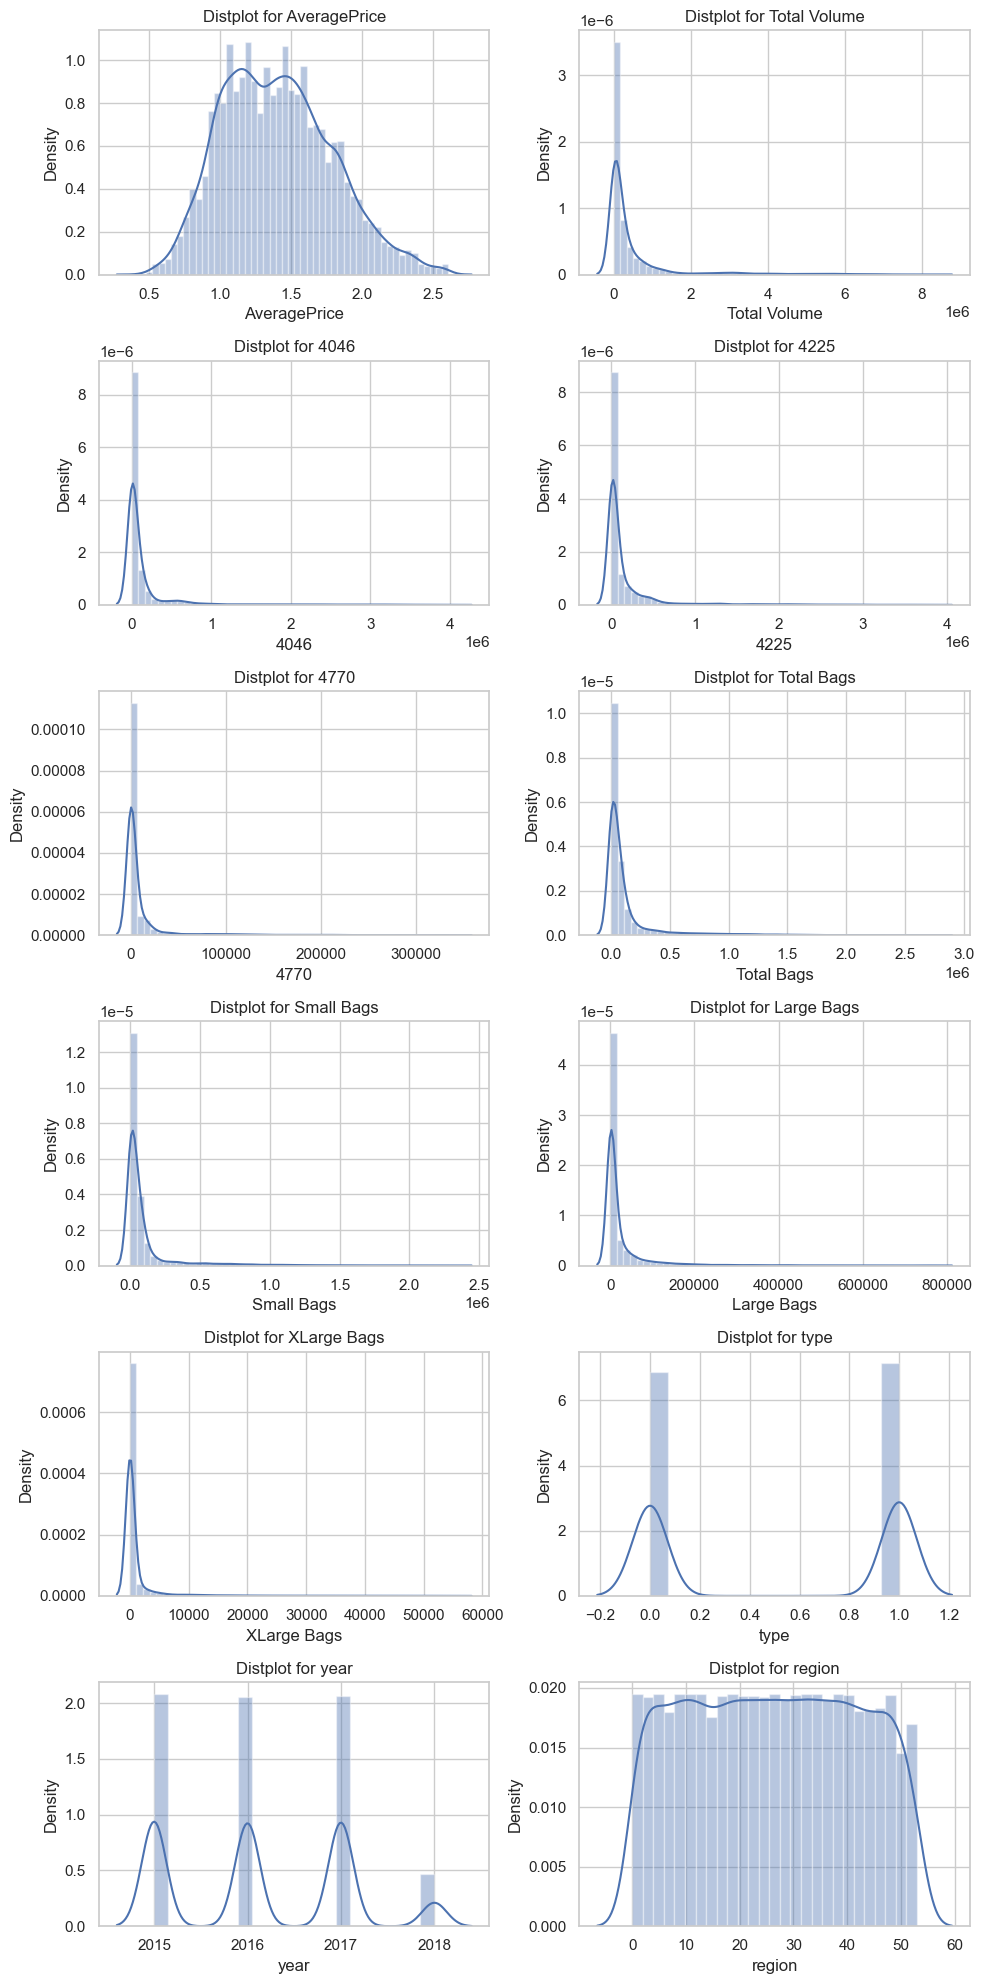

In [93]:
# Checking for the skewness using Dist plot  
rows = 6
columns = 2
plt.figure(figsize = (10, 20))

for i in range(0, len(updated_df_r.columns)):
    plt.subplot(rows, columns, i+1)
    sns.distplot(updated_df_c[updated_df_r.columns[i]]) 
    plt.title("Distplot for " + updated_df_r.columns[i]) 
    plt.tight_layout()

plt.show()

In majority of columns, skewness is present.

In [94]:
# Checking for the skewness using skew() method
updated_df_r.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.005773
dtype: float64

Skewness present in 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' columns. Here, 'AveragePrice' is the target variable therfore, it will not be taken for skewness reduction.

In [95]:
# List of the columns to be transformed
columns_to_transform = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

# Copying data
updated_df_r2 = updated_df_r.copy()

# Reduing skewnees using yeojohnson Transformation
for column in columns_to_transform: 
    transformed_data, lambda_value = yeojohnson(updated_df_r[column] + 1)
    updated_df_r2[column] = transformed_data

In [96]:
# Again checking the skewness
updated_df_r2[columns_to_transform].skew()

Total Volume   -0.006786
4046           -0.037029
4225           -0.043925
4770            0.060799
Total Bags     -0.022331
Small Bags     -0.027894
Large Bags     -0.095616
XLarge Bags     0.889546
dtype: float64

After the application of data transformation, the skewness in the distribution of the skewed columns has been effectively reduced, resulting in a more balanced and symmetric distribution

### Checking the Correlation Coefficient Matrix

In [97]:
# Checking the correalation coefficient matrix
correlation_coefficient = updated_df_r2.corr()
correlation_coefficient

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
AveragePrice,1.000000,-0.576832,-0.549407,-0.448967,-0.493974,-0.564861,-0.494184,-0.479001,-0.384646,0.608447,0.099910,0.010428
Total Volume,-0.576832,1.000000,0.889876,0.924457,0.817913,0.940078,0.905889,0.682157,0.627513,-0.800836,0.076580,0.065707
4046,-0.549407,0.889876,1.000000,0.765557,0.736392,0.800246,0.779953,0.602937,0.571840,-0.727093,-0.002317,0.160061
4225,-0.448967,0.924457,0.765557,1.000000,0.796320,0.818866,0.785455,0.615470,0.583162,-0.748263,-0.004568,0.032599
4770,-0.493974,0.817913,0.736392,0.796320,1.000000,0.760787,0.755178,0.547983,0.615589,-0.780823,-0.052310,0.035792
Total Bags,-0.564861,0.940078,0.800246,0.818866,0.760787,1.000000,0.950368,0.730021,0.612081,-0.726021,0.211030,0.066087
Small Bags,-0.494184,0.905889,0.779953,0.785455,0.755178,0.950368,1.000000,0.566470,0.601978,-0.721576,0.186075,0.052270
Large Bags,-0.479001,0.682157,0.602937,0.615470,0.547983,0.730021,0.566470,1.000000,0.452123,-0.501175,0.188651,0.086138
XLarge Bags,-0.384646,0.627513,0.571840,0.583162,0.615589,0.612081,0.601978,0.452123,1.000000,-0.661503,0.160372,-0.021706
type,0.608447,-0.800836,-0.727093,-0.748263,-0.780823,-0.726021,-0.721576,-0.501175,-0.661503,1.000000,0.007399,0.021970


Let's use the heatmap to visualize and interpret the correlation coefficient matrix.

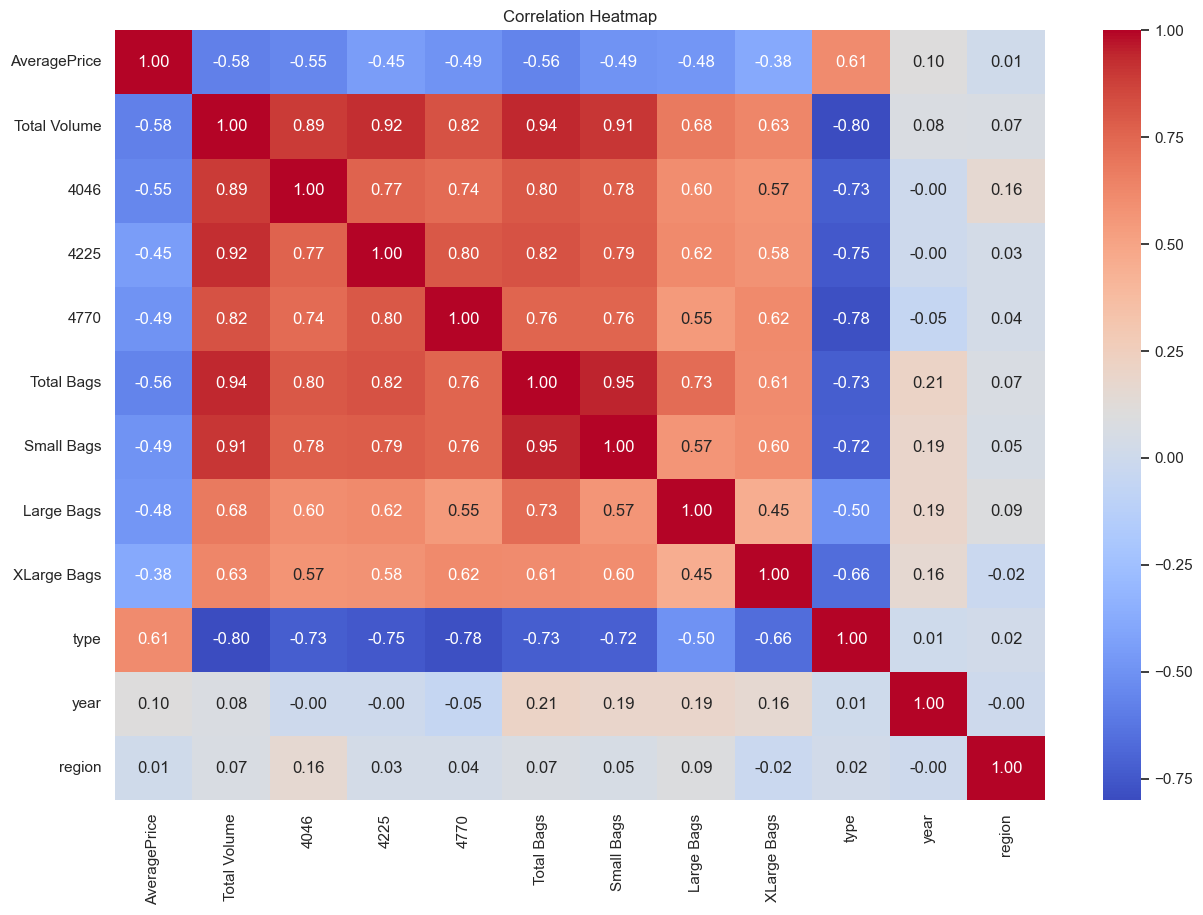

In [98]:
# Plotting the heatmap for correlation coefficient matrix
plt.figure(figsize = (15, 10))
sns.heatmap(correlation_coefficient, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

#### Observations:

AveragePrice has a strong negative correlation (-0.586) with Total Volume, suggesting that as the average price of a product decreases, the total volume of sales tends to increase.

Total Volume is strongly positively correlated (0.890) with 4046, indicating a strong association between the total volume of sales and the sales of product 4046.

Product 4770 has a moderate positive correlation (0.797) with Total Bags, suggesting that as sales of product 4770 increase, the total number of bags used tends to increase.

Large Bags and Small Bags have a strong positive correlation (0.951), indicating that the sales of both large and small bags tend to move together.

Type has a moderate positive correlation (0.616) with AveragePrice, implying that the type of product may influence its average price.

Year has a weak positive correlation (0.092) with AveragePrice, suggesting a slight upward trend in average prices over the years.

Region shows a very weak negative correlation (-0.005) with AveragePrice, indicating that there is little to no relationship between the region and the average price of products.

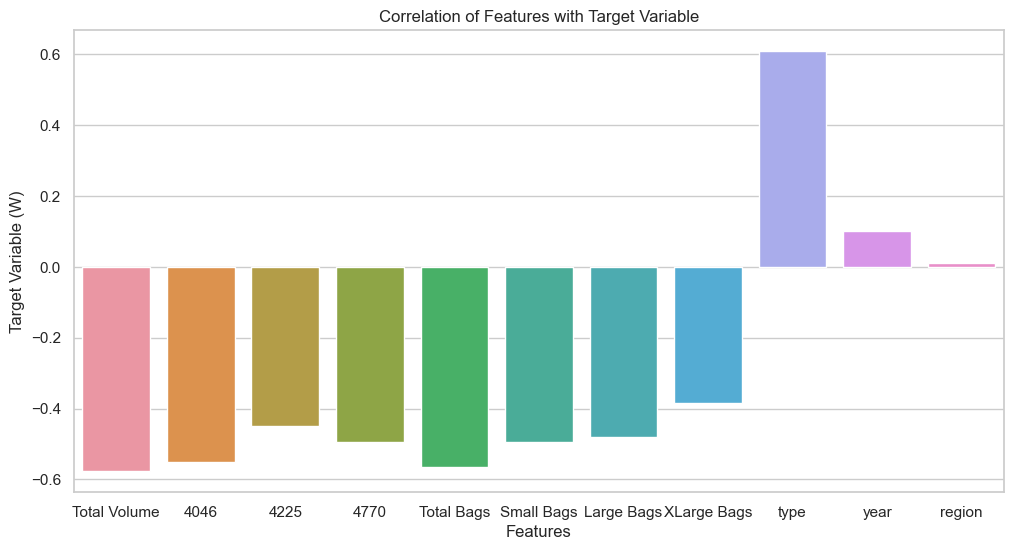

In [99]:
# Checking for the correlation between features and target variable separately
target = 'AveragePrice'

correlation_matrix = updated_df_r2.corr()
correlations_with_target = correlation_matrix[target].drop(target)

plt.figure(figsize=(12, 6))
sns.barplot(x = correlations_with_target.index, y = correlations_with_target.values)
plt.xlabel('Features')
plt.ylabel('Target Variable (W)')
plt.title('Correlation of Features with Target Variable')

plt.show()

Here's a concise overview of the correlations between the dependent variable (AveragePrice) and each independent variable along with their corresponding values:

Total Volume: Strong negative correlation (-0.577)

4046: Strong negative correlation (-0.549)

4225: Moderate negative correlation (-0.449)

4770: Moderate negative correlation (-0.494)

Total Bags: Moderate negative correlation (-0.494)

Small Bags: Moderate negative correlation (-0.565)

Large Bags: Moderate negative correlation (-0.479)

XLarge Bags: Weak negative correlation (-0.385)

Type: Moderate positive correlation (0.608)

Year: Weak positive correlation (0.100)

Region: Weak positive correlation (0.010)

### Feature Engineering

In [100]:
# Extracting features and target from the dataset
features = updated_df_r2.drop(columns = 'AveragePrice')
target = updated_df_r2['AveragePrice']

### Feature Scaling

In [101]:
# Performing standard scaling on the features
scaler = StandardScaler()
scaled_df = scaler.fit_transform(features)

In [102]:
updated_features = pd.DataFrame(scaled_df, columns = features.columns[:])
updated_features.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-0.065093,-0.652443,0.360267,-0.256854,-0.526954,-0.334928,-0.801011,-0.670454,-1.026443,-1.214908,-1.698613
1,-0.137271,-0.774615,0.278356,-0.205623,-0.487633,-0.298716,-0.790630,-0.670454,-1.026443,-1.214908,-1.698613
2,0.215514,-0.728265,0.657681,0.009190,-0.555775,-0.362054,-0.777414,-0.670454,-1.026443,-1.214908,-1.698613
3,0.029845,-0.627149,0.477531,-0.147170,-0.702296,-0.499205,-0.715497,-0.670454,-1.026443,-1.214908,-1.698613
4,-0.170459,-0.680048,0.270966,-0.135637,-0.675569,-0.478642,-0.619611,-0.670454,-1.026443,-1.214908,-1.698613


### Checking the variance inflation factor

In [103]:
# Calculate VIF for each column
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

        Features        VIF
0   Total Volume  53.006851
1           4046   7.261456
2           4225  11.317644
3           4770   3.938364
4     Total Bags  34.991731
5     Small Bags  17.016768
6     Large Bags   3.502293
7    XLarge Bags   2.027464
8           type   3.693999
9           year   1.324405
10        region   1.087736


'Total Volume' feature has highest VIF value let's drop it and again calculate the VIF values.

In [104]:
# Dropping 'Total Volume' feature
updated_features.drop('Total Volume', inplace = True, axis = 1)

In [105]:
# Calculate VIF for each column again
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

      Features        VIF
0         4046   3.746510
1         4225   4.279725
2         4770   3.925905
3   Total Bags  24.940551
4   Small Bags  17.016749
5   Large Bags   3.460885
6  XLarge Bags   2.012627
7         type   3.490410
8         year   1.322875
9       region   1.079847


This time 'Total Bags' feature has highest VIF value let's drop it and again calculate the VIF values.

In [106]:
# Dropping 'Total Bags' feature
updated_features.drop('Total Bags', inplace = True, axis = 1)

In [107]:
# Calculate VIF for each column again
vif_data = pd.DataFrame()
vif_data["Features"] = updated_features.columns
vif_data["VIF"] = [variance_inflation_factor(updated_features.values, i) for i in range(updated_features.shape[1])]

# Print the VIF data
print(vif_data)

      Features       VIF
0         4046  3.728897
1         4225  4.131177
2         4770  3.924503
3   Small Bags  4.098406
4   Large Bags  1.861867
5  XLarge Bags  2.012354
6         type  3.487388
7         year  1.300458
8       region  1.079842


Now all the features exhibit less VIF values that shows the multicollinearty issue has been resolved.

##  Model Building

In [108]:
# Storing features and target in X and y
X = updated_features
y = target

### Finding the best random state

In [109]:
# Function to find the best random state
def find_best_random_state(X, y, iterations = 200):
    max_r2_score = 0
    max_random_state = 0
    
    for i in range(1, iterations + 1):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = i)
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        pred = lr.predict(X_test)
        r2score = r2_score(y_test, pred)
        
        if r2score > max_r2_score:
            max_r2_score = r2score
            max_random_state = i
    
    return max_r2_score, max_random_state

# Calling the function to find the best random state
best_r2_score, best_random_state = find_best_random_state(X, y)

print("Best R2 score is", best_r2_score, "at random state", best_random_state)

Best R2 score is 0.4947939645792284 at random state 161


### Splitting the dataset into training and testing sets

In [110]:
# Splitting the dataset for training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = best_random_state)

### Different Models for predicting Wins

In [111]:
models_name = ['Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression', 'K-Nearest Neighbors', 
               'Support Vector Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'Extra Trees Regressor', 
               'Gradient Boosting Regressor', 'AdaBoost Regressor', 'Bagging Regressor', 'XGBoost Regressor']

In [112]:
models = [LinearRegression(), 
          Lasso(), 
          Ridge(), 
          ElasticNet(), 
          KNeighborsRegressor(), 
          SVR(), 
          DecisionTreeRegressor(),
          RandomForestRegressor(), 
          ExtraTreesRegressor(), 
          GradientBoostingRegressor(), 
          AdaBoostRegressor(), 
          BaggingRegressor(),
          xgb.XGBRegressor()]

In [113]:
models_r2_score = [] # List for storing the models R2 score
models_mae = []      # List for storing the models Mean Absolute Error 
models_mse = []      # List for storing the models Mean Squared Error
models_rmse = []     # List for storing the models Root Mean Squred Error
i = 0
for model in models:
    
    print(models_name[i])
    
    model.fit(X_train, y_train)
    pred_y = model.predict(X_test)
    
    r2score = r2_score(y_test,pred_y)*100
    models_r2_score.append(r2score)
    
    mae = mean_absolute_error(y_test,pred_y)
    models_mae.append(mae)
    
    mse = mean_squared_error(y_test,pred_y)
    models_mse.append(mse)
    
    rmse = np.sqrt(mean_squared_error(y_test,pred_y))
    models_rmse.append(rmse)
    
    print("R2 score:", r2score)
    print("Mean Absolute Error:", mae)
    print("Mean Square Error:", mse)
    print("Root Mean Square Error:", rmse)
    print('\n')
    i += 1

Linear Regression
R2 score: 49.47939645792284
Mean Absolute Error: 0.22077621743714884
Mean Square Error: 0.08003126652169679
Root Mean Square Error: 0.28289797899896135


Lasso Regression
R2 score: -0.07529828841486008
Mean Absolute Error: 0.32079780822784154
Mean Square Error: 0.15853240674149593
Root Mean Square Error: 0.39816128232350256


Ridge Regression
R2 score: 49.47906980568685
Mean Absolute Error: 0.22077589055247115
Mean Square Error: 0.08003178398170967
Root Mean Square Error: 0.2828988935674894


ElasticNet Regression
R2 score: -0.07529828841486008
Mean Absolute Error: 0.32079780822784154
Mean Square Error: 0.15853240674149593
Root Mean Square Error: 0.39816128232350256


K-Nearest Neighbors
R2 score: 81.91984300931617
Mean Absolute Error: 0.11676750070283946
Mean Square Error: 0.02864134157998313
Root Mean Square Error: 0.16923753005755884


Support Vector Regressor
R2 score: 71.11845434185882
Mean Absolute Error: 0.15400031309723547
Mean Square Error: 0.0457521588434732

Linear Regression, Lasso Regression, and Ridge Regression all perform with R2 scores of approximately 49.48, indicating a good fit to the data. They also have relatively low Mean Absolute Error (MAE), Mean Square Error (MSE), and Root Mean Square Error (RMSE) values, suggesting accurate predictions with small errors.

Random Forest Regressor and Extra Trees Regressor stand out as top-performing models with R2 scores of 84.92 and 87.26, respectively. These models demonstrate excellent fits to the data and provide highly accurate predictions with low errors across all metrics.

K-Nearest Neighbors (KNN) also performs exceptionally well with an R2 score of 81.92. It has low MAE, MSE, and RMSE values, indicating accurate predictions and minimal errors.

Bagging Regressor and XGBoost Regressor also deliver strong results with R2 scores of 83.16 and 82.71, respectively. They provide accurate predictions with low errors.

Support Vector Regressor (SVR) achieves a respectable R2 score of 71.12 and offers relatively low errors.

Decision Tree Regressor and Gradient Boosting Regressor have R2 scores of 68.56 and 67.42, respectively. While not the top performers, they still provide decent fits to the data with moderate errors.

AdaBoost Regressor has the lowest R2 score among the models at 46.19, indicating a weaker fit to the data with higher errors.

## Cross Validation

In [114]:
i = 0
diff_r2_cv = []
cv_mean = []
for model in models:
    print(models_name[i])
    print("R2 Score:", models_r2_score[i])
    cv_score = cross_val_score(model, X, y)
    print("Cross Validation Scores:", cv_score*100)
    cv_mean.append(cv_score.mean()*100)
    print("Mean of Cross Validation Scores:", cv_score.mean()*100)
    diff = models_r2_score[i] - cv_score.mean()*100
    print("Difference between R2 Score and Cross Validation score:", diff)
    diff_r2_cv.append(diff)
    print('\n')
    i += 1

Linear Regression
R2 Score: 49.47939645792284
Cross Validation Scores: [-32.60746164  -0.51299519  38.72657024  12.53522825   9.91340643]
Mean of Cross Validation Scores: 5.610949616220493
Difference between R2 Score and Cross Validation score: 43.868446841702344


Lasso Regression
R2 Score: -0.07529828841486008
Cross Validation Scores: [-405.23001046  -72.93968016   -5.12334797  -38.4586896   -78.46373803]
Mean of Cross Validation Scores: -120.04309324076277
Difference between R2 Score and Cross Validation score: 119.96779495234792


Ridge Regression
R2 Score: 49.47906980568685
Cross Validation Scores: [-32.60770539  -0.50291985  38.72824241  12.53370765   9.91240406]
Mean of Cross Validation Scores: 5.612745775836898
Difference between R2 Score and Cross Validation score: 43.86632402984995


ElasticNet Regression
R2 Score: -0.07529828841486008
Cross Validation Scores: [-405.23001046  -72.93968016   -5.12334797  -38.4586896   -78.46373803]
Mean of Cross Validation Scores: -120.0430932

Extra Trees Regressor is the top-performing model. It has the highest R2 score, indicating an excellent fit to the training data, and a relatively small difference between the R2 score and the cross-validation score, suggesting stability in its performance. 

Random Forest Regressor achieved an impressive R2 score of 84.92%, indicating an excellent fit to the training data. However, the difference between its R2 score and cross-validation scores was relatively larger at 55.91%, suggesting the possibility of some overfitting. 
Bagging Regressor also performed well with an R2 score of 83.16%. However, it had a larger difference between the R2 score and cross-validation scores at 60.26%, indicating potential variations in its performance on different subsets of data.

XGBoost Regressor had a strong R2 score of 82.71%, and the difference between its R2 score and cross-validation scores was 47.12%, which is relatively moderate compared to some other models.

K-Nearest Neighbors (KNN) achieved a high R2 score of 81.92%. However, it had a larger difference between the R2 score and cross-validation scores at 70.76%, suggesting some instability.

In [115]:
# Storing the performance summary of all the models
models_performance = pd.DataFrame({'Model': models_name, 
                  'R2 Score': models_r2_score,
                  'MAE': models_mae,
                  'MSE': models_mse,
                  'RMSE': models_rmse,
                  'CV Score Mean': cv_mean,
                  'Difference: R2 Score & CV Score': diff_r2_cv})

In [116]:
models_performance

,Model,R2 Score,MAE,MSE,RMSE,CV Score Mean,Difference: R2 Score & CV Score
0,Linear Regression,49.479396,0.220776,0.080031,0.282898,5.610950,43.868447
1,Lasso Regression,-0.075298,0.320798,0.158532,0.398161,-120.043093,119.967795
2,Ridge Regression,49.479070,0.220776,0.080032,0.282899,5.612746,43.866324
3,ElasticNet Regression,-0.075298,0.320798,0.158532,0.398161,-120.043093,119.967795
4,K-Nearest Neighbors,81.919843,0.116768,0.028641,0.169238,11.164581,70.755262
5,Support Vector Regressor,71.118454,0.154000,0.045752,0.213898,0.156212,70.962242
6,Decision Tree Regressor,68.556449,0.142792,0.049811,0.223183,-34.281097,102.837546
7,Random Forest Regressor,84.915363,0.108365,0.023896,0.154583,29.001517,55.913846
8,Extra Trees Regressor,87.262182,0.098302,0.020178,0.142051,32.645656,54.616526
9,Gradient Boosting Regressor,67.419870,0.170490,0.051611,0.227181,32.552675,34.867195


## Fianl Model

After careful evaluation, the Extra Trees Regressor model stands out as the best model and will serve as the final model because it has the highest R2 score, indicating an excellent fit to the training data, and a relatively small difference between the R2 score and the cross-validation score, suggesting stability in its performance.

## Hyper Parameter Tuning

In [117]:
# Parameters grid for hyper parameter tuning
parameters_grid = {
    'n_estimators': [100, 200, 300],  # Number of decision trees in the ensemble
    'max_depth': [None, 10, 20],      # Maximum depth of each decision tree (or None for unlimited depth)
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required to be at a leaf node
}

In [118]:
# Using grid search CV for enhancing the model performance
grid_search_cv = GridSearchCV(ExtraTreesRegressor(), param_grid = parameters_grid, cv = 5, scoring = 'r2')

In [119]:
# Performing grid search to find the best hyperparameters for the model
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

In [120]:
# Retrieving the best hyperparameters found during grid search
grid_search_cv.best_params_

{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 300}

In [121]:
# Storing the best parameters
best_params = grid_search_cv.best_params_

In [122]:
# Retrieving the best mean cross-validated score achieved during grid search
grid_search_cv.best_score_

0.8616781494733692

In [123]:
# Creating final model
final_model = ExtraTreesRegressor(**best_params)
final_model.fit(X_train, y_train)
pred_values = final_model.predict(X_test)
r2_score = r2_score(y_test, pred_values)
print(r2_score * 100)

87.62242417581307


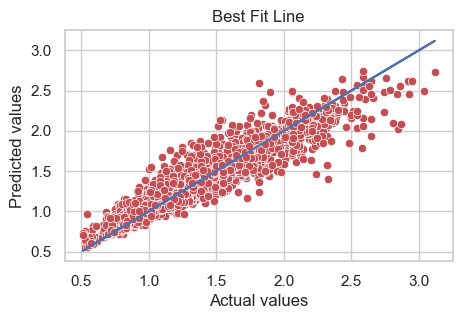

In [124]:
# Comparing actual vaules and predicted vaulues graphically
plt.figure(figsize = (5, 3))
sns.scatterplot(x = y_test, y = pred_values, color='r')
plt.plot(y_test, y_test, color='b')
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Best Fit Line")
plt.show()

## Saving Final Model

In [125]:
# Saving the model 
joblib.dump(final_model, "Avocado_Average_Price_Prediction.pkl")

['Avocado_Average_Price_Prediction.pkl']

In [126]:
# Loading the saved model
model = joblib.load("Avocado_Average_Price_Prediction.pkl")

# Predicting values
predicted_values = model.predict(X_test)

In [127]:
# Saving the actual values
actual_values = np.array(y_test)

In [128]:
# Comparing the actual and predicted values
actual_vs_predicted = pd.DataFrame({'Actual Vlaues' : actual_values , 'Predicted Values' : predicted_values})
actual_vs_predicted

,Actual Vlaues,Predicted Values
0,1.69,1.691600
1,1.54,1.561967
2,0.89,0.904000
3,1.42,1.448000
4,1.06,0.990067
...,...,...
3552,1.55,1.492133
3553,1.05,1.075233
3554,1.54,1.580967
3555,1.93,2.020300


## Avocado Project Documentation

### Project Overview


### Objective
The Avocado Project project focuses on two primary objectives.

#### Objective-1
With the help of classification model, analyze and understand regional variations in avocado consumption by examining the dependent variable 'region' and exploring its relationship with independent variables like total volume, type, year, and more. This analysis will provide insights into regional avocado consumption patterns and help identify factors influencing consumption differences among various regions.

#### Objective-2
With the help of regression model, accurately forecasts avocado prices based on various independent variables such as total volume, type, year, region and more. This analysis will offer insights into the patterns of Average Price and aid in identifying the factors that contribute to price variations

### Data Source
The dataset used for this avocado project is sourced from a CSV file containing information about avocado sales, including attributes such as average price, total volume, types of avocados, yearly data, regional details, and other relevant factors influencing avocado market dynamics.

### Data Preprocessing
#### Data Cleaning
Data cleaning was performed to handle missing values, ensuring the dataset's completeness.
Outliers, if present, were identified and addressed appropriately.

#### Feature Engineering
Relevant features were selected or created to enhance models performance.
Feature extraction and transformation techniques, such as encoding categorical variables, were applied as needed.

### Data Splitting
The dataset was divided into training and testing sets to evaluate models performance. The typical split is 70% for training and 30% for testing in both the models.

### Feature Scaling
Features were scaled or normalized to ensure that models are not biased by variables with larger scales.

### Models Employed
#### Model Selection

Several machine learning models were employed to predict 'region' and 'AveragePrice':
#### In case of Classification model
'Logistic Regression', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'Support Vector Classifier', 'Decision Tree Classifier', 'Random Forest Classifier', 'Extra Trees Classifier', 'Gradient Boosting Classifier', 'AdaBoost Classifier', 'Bagging Classifier', 'XGBoost Classifier'.

#### In case of Regression model
'Linear Regression', 'Lasso Regression', 'Ridge Regression', 'ElasticNet Regression', 'K-Nearest Neighbors', 'Support Vector Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'Extra Trees Regressor', 'Gradient Boosting Regressor', 'AdaBoost Regressor', 'Bagging Regressor', 'XGBoost Regressor'.

Each model mentioned above was trained on the training dataset.

#### Model Evaluation Metrics
#### In case of Classification model
The following evaluation metrics were used to assess model performance in predicting regional variations:

Accuracy: Measures the proportion of correctly classified regional variations by the model.

Precision: Evaluates the model's ability to correctly predict specific regional variations when they occur.

Recall: Measures the model's ability to identify all actual instances of specific regional variations.

F1-Score: Combines precision and recall to provide a balanced measure of the model's performance in capturing regional variations accurately.

#### In case of Regression model
The following evaluation metrics were used to assess model performance in predicting Average Price:

Mean Absolute Error (MAE): Measures the average absolute difference between predicted and actual Average Price values.

Mean Squared Error (MSE): Provides a measure of the squared error between predicted and actual Average Price values.

Root Mean Square Error (RMSE): Provides a measure of the error between predicted and actual Average Price values, with a greater emphasis on larger errors.

R-squared (R2): Indicates the proportion of variance in the Average Price that is predictable from the independent variables, helping gauge the overall goodness of fit of the model to the data.

### Model Evaluation and Hyperparameter Tuning
#### Model Comparison
The performance of each model was compared based on the evaluation metrics mentioned above in case of both classification and regression.

#### Hyperparameter Tuning
Hyperparameter tuning techniques, such as grid search, was employed to optimize models performance.

### Results
#### Final Model Selection
#### In case of Classification model
After careful evaluation, the Extra Trees Classifier model was selected as the final model for for predicting avocado production by region, primarily due to its outstanding performance.

#### In case of Regression model
After careful evaluation, the Extra Trees Regressor model was selected as the final model for predicting avocado prices, owing to its exceptional performance in the context of avocado price forecasting.

### Key Findings
#### In case of Classification model
Accurate predictions of avocado production by region are crucial for supply chain management and market planning.
The selected model's performance in this regard, as well as its ability to capture regional variations, would be essential findings.

#### In case of Regression model
Accurate forecasts of avocado prices are critical for stakeholders in the avocado industry.
The model's effectiveness in predicting prices in different regions and its overall accuracy are key findings for optimizing pricing strategies and market decisions in the avocado industry.

### Conclusion
In conclusion, the Avocado Project focuses on addressing the complexities of avocado region prediction and price forecasting using advanced machine learning models. By analyzing data and deploying predictive models, stakeholders within the avocado industry can gain valuable insights and make data-driven decisions. These insights enable optimized supply chain management, pricing strategies, and market planning, ultimately contributing to more efficient and informed decision-making within the avocado industry.